# The Datasaurus Dozen: same stats, big differences, and the amalgamation paradox.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
tablesaur = pd.read_table("datasaurusdozen.csv")
tablesaur.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [3]:
tablesaur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
dataset    1846 non-null object
x          1846 non-null float64
y          1846 non-null float64
dtypes: float64(2), object(1)
memory usage: 43.3+ KB


In [4]:
tablesaur.dataset.unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [5]:
tablesaur.describe()

,x,y
count,1846.000000,1846.000000
mean,54.265695,47.835099
std,16.713001,26.847766
min,15.560750,0.015119
25%,41.073403,22.561073
50%,52.591269,47.594450
75%,67.277845,71.810778
max,98.288123,99.694680


In [6]:
f1 = "y~x"
model = ols(formula = f1, data = tablesaur).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.072
Date:                Mon, 20 May 2019   Prob (F-statistic):            0.00454
Time:                        15:24:53   Log-Likelihood:                -8688.5
No. Observations:                1846   AIC:                         1.738e+04
Df Residuals:                    1844   BIC:                         1.739e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.5901      2.119     25.285      0.000      49.433      57.747
x             -0.1061      0.037     -2.841      0.005      -0.179      -0.033
==============================================================================
Omnibus:                     3220.109   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.271
Skew:                           0.167   Prob(JB):                     1.15e-29
Kurtosis:                       1.727   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ANOVA before bootstrapping
Null hypothesis: There is no difference (alpha = 0.05) between the distribution of a given (or named) subset and the distribution of another. <br>
Alternative hypothesis: there is a difference (alpha = 0.05) between the distribution of a named subset and that of another.

In [7]:
formula = 'y ~ C(dataset) + x'
lm = ols(formula, tablesaur).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq      df         F    PR(>F)
C(dataset)  2.091421e-02    12.0  0.000002  1.000000
x           5.796280e+03     1.0  8.019719  0.004678
Residual    1.324084e+06  1832.0       NaN       NaN


Based on the f-statistic, we fail to reject the null hypothesis. There is no difference (alpha = 0.05) between the distribution of a given (or named) dataset and the distribution of another.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'All that data')

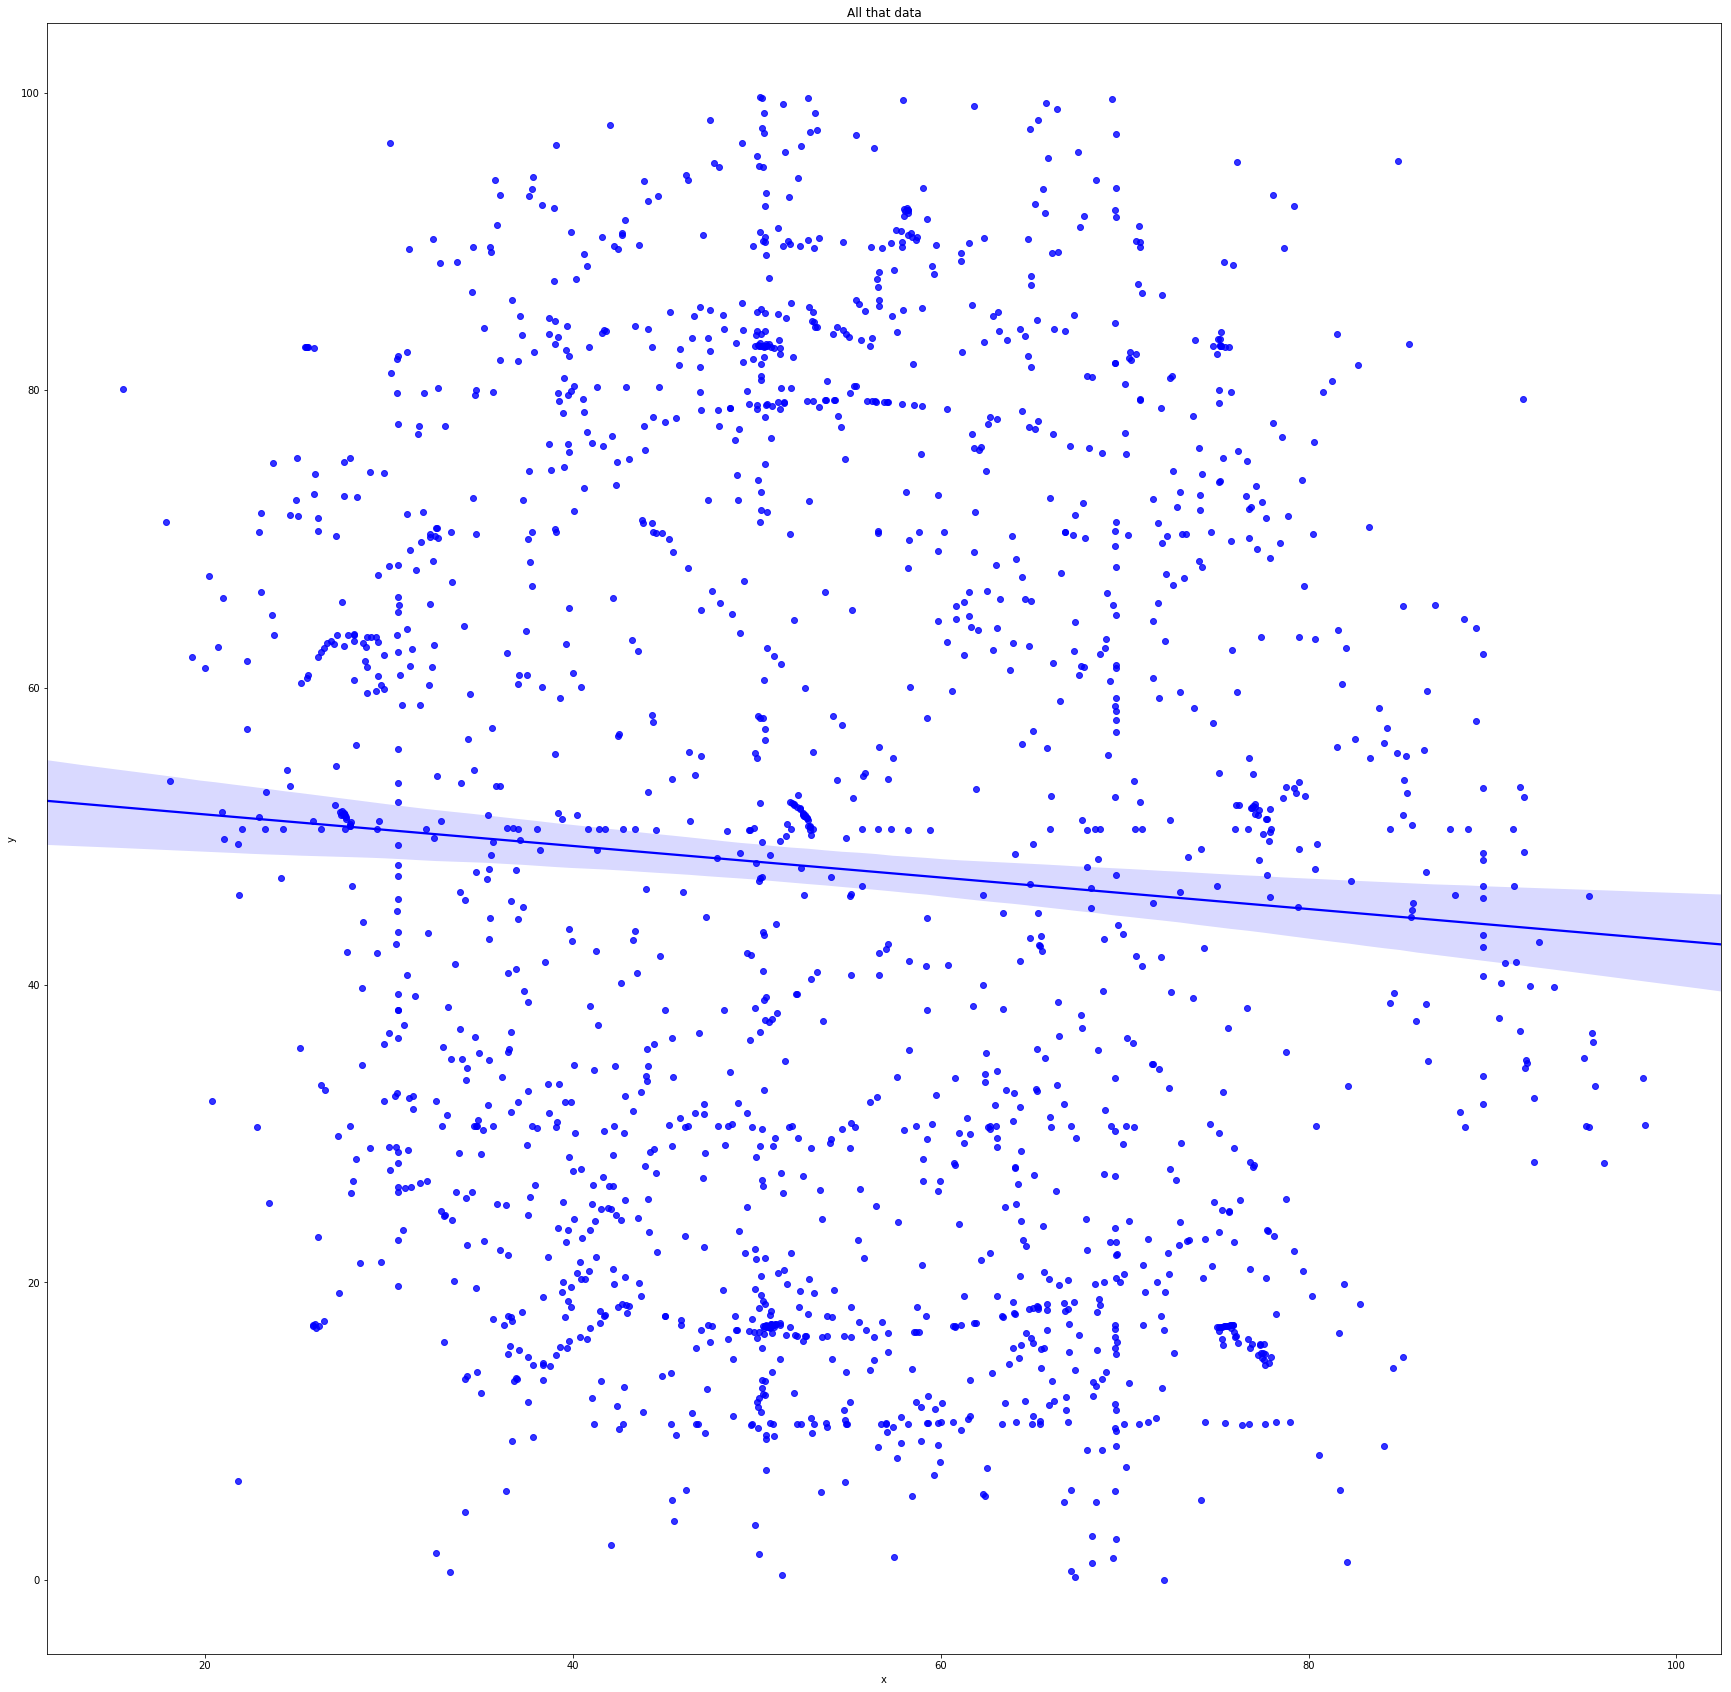

In [8]:
#Deprecation warning has to do with the scipy stats version in anaconda and will be ignored for now.
f, ax = plt.subplots(figsize = (30,30))
sns.regplot(x = "x", y = "y", data = tablesaur, color = 'b')
plt.title("All that data")


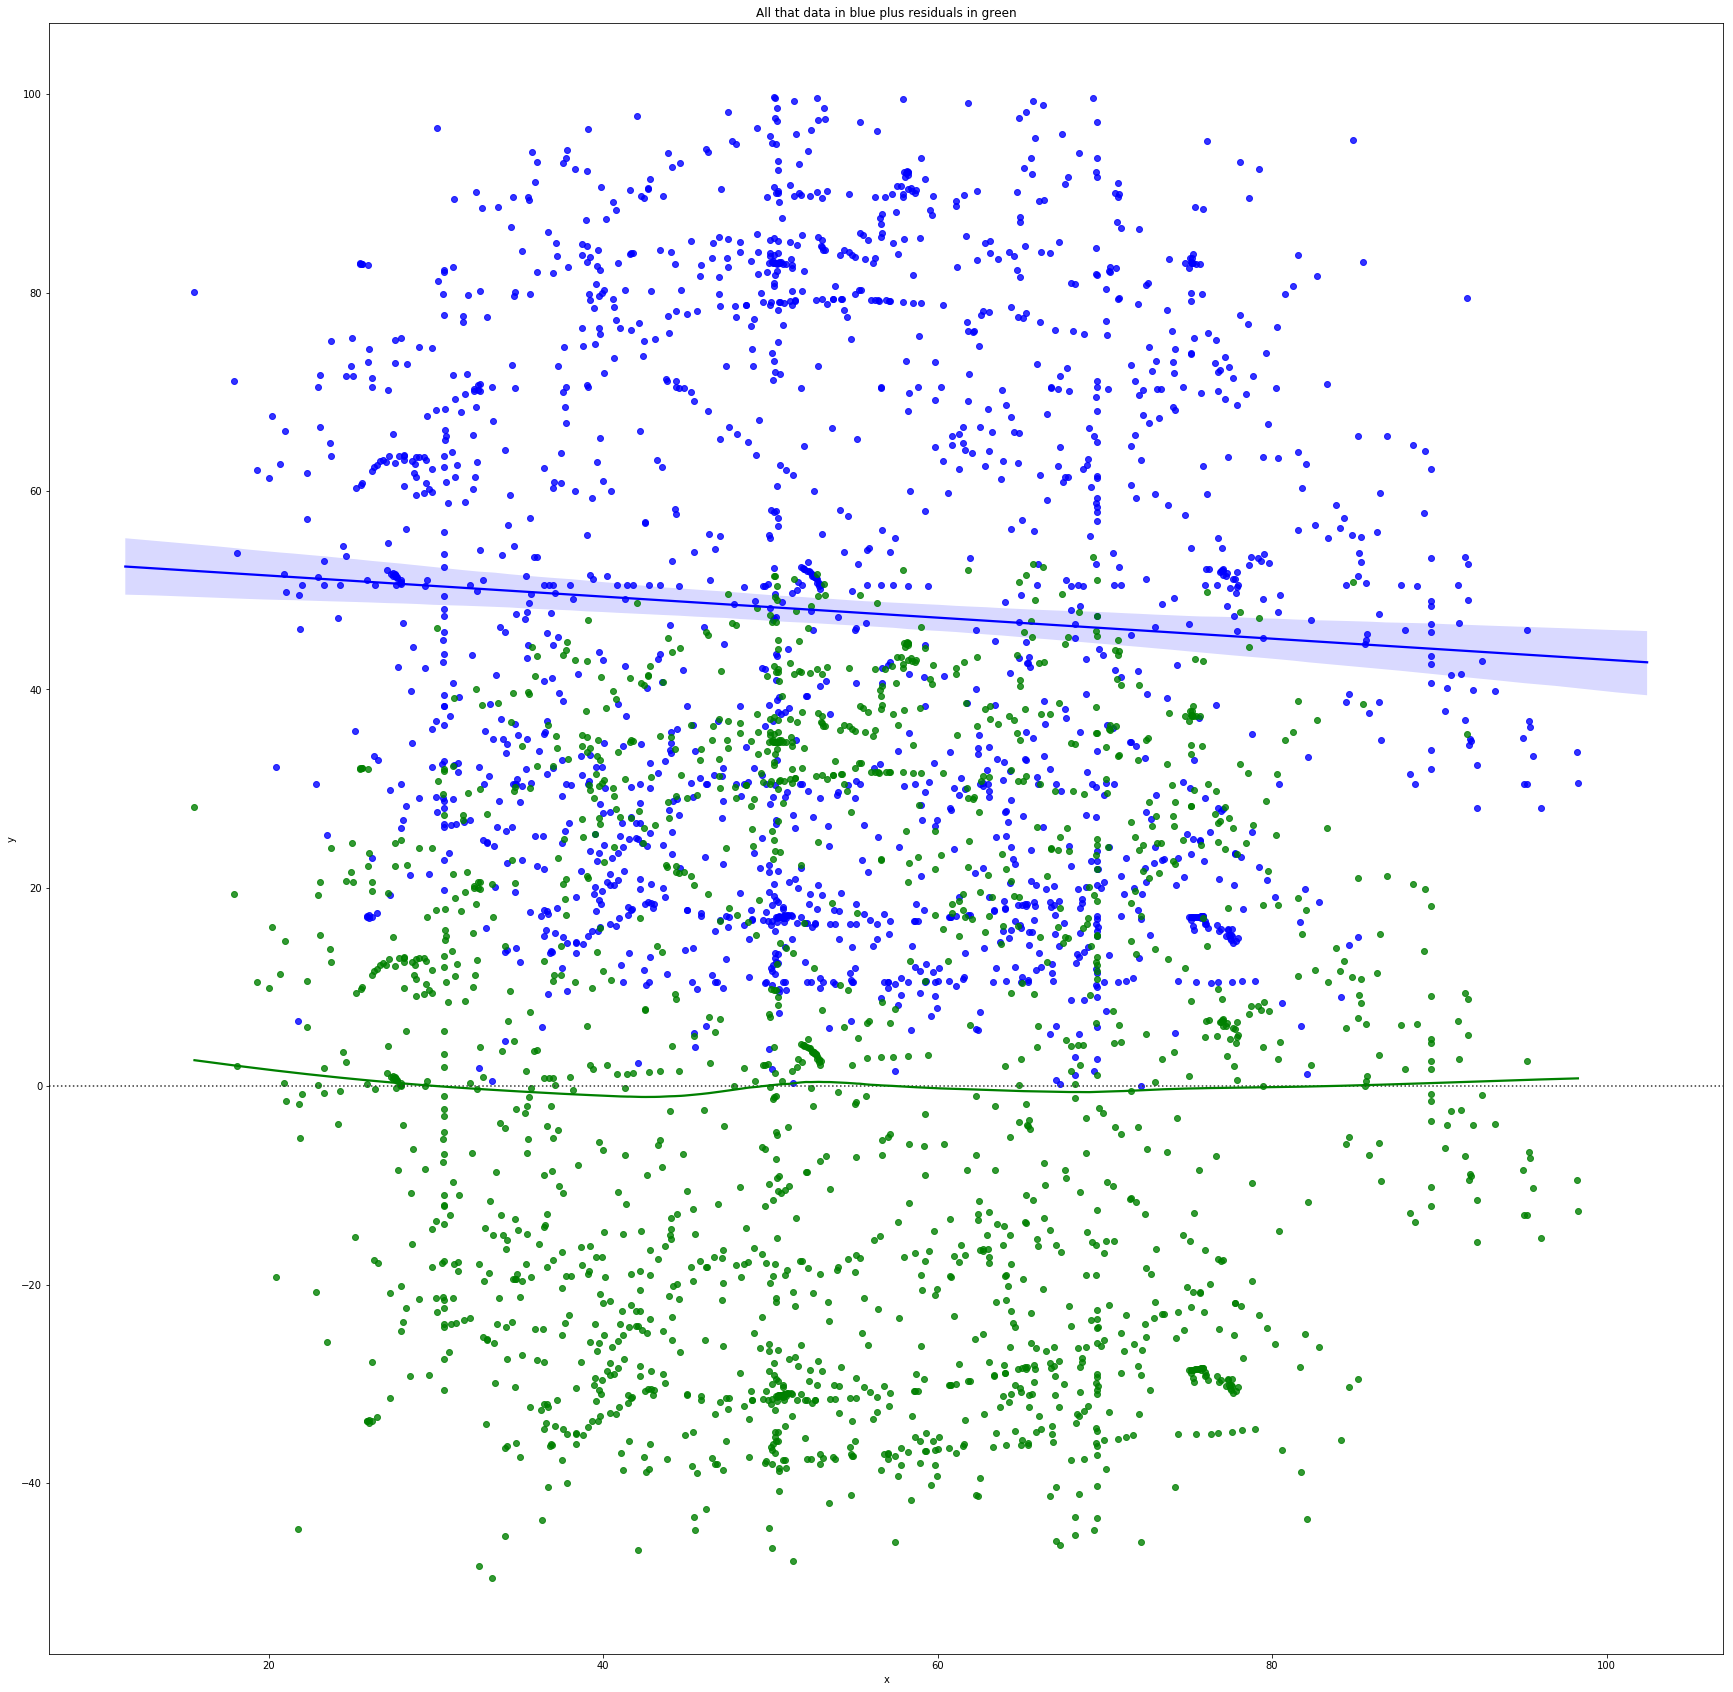

In [9]:
f, ax = plt.subplots(figsize = (30,30))
sns.regplot(x = "x", y = "y", data = tablesaur, color = 'b')
plt.title("All that data in blue plus residuals in green")
sns.residplot('x', 'y', data = tablesaur, lowess=True, color = 'g')

In [10]:
rc={'axes.titlesize' : 40.0, 
    'axes.labelsize': 20.0, 
    'legend.fontsize': 10.0, 
    'axes.titlesize': 20.0, 
    'xtick.labelsize': 20.0}
plt.rcParams.update(**rc)

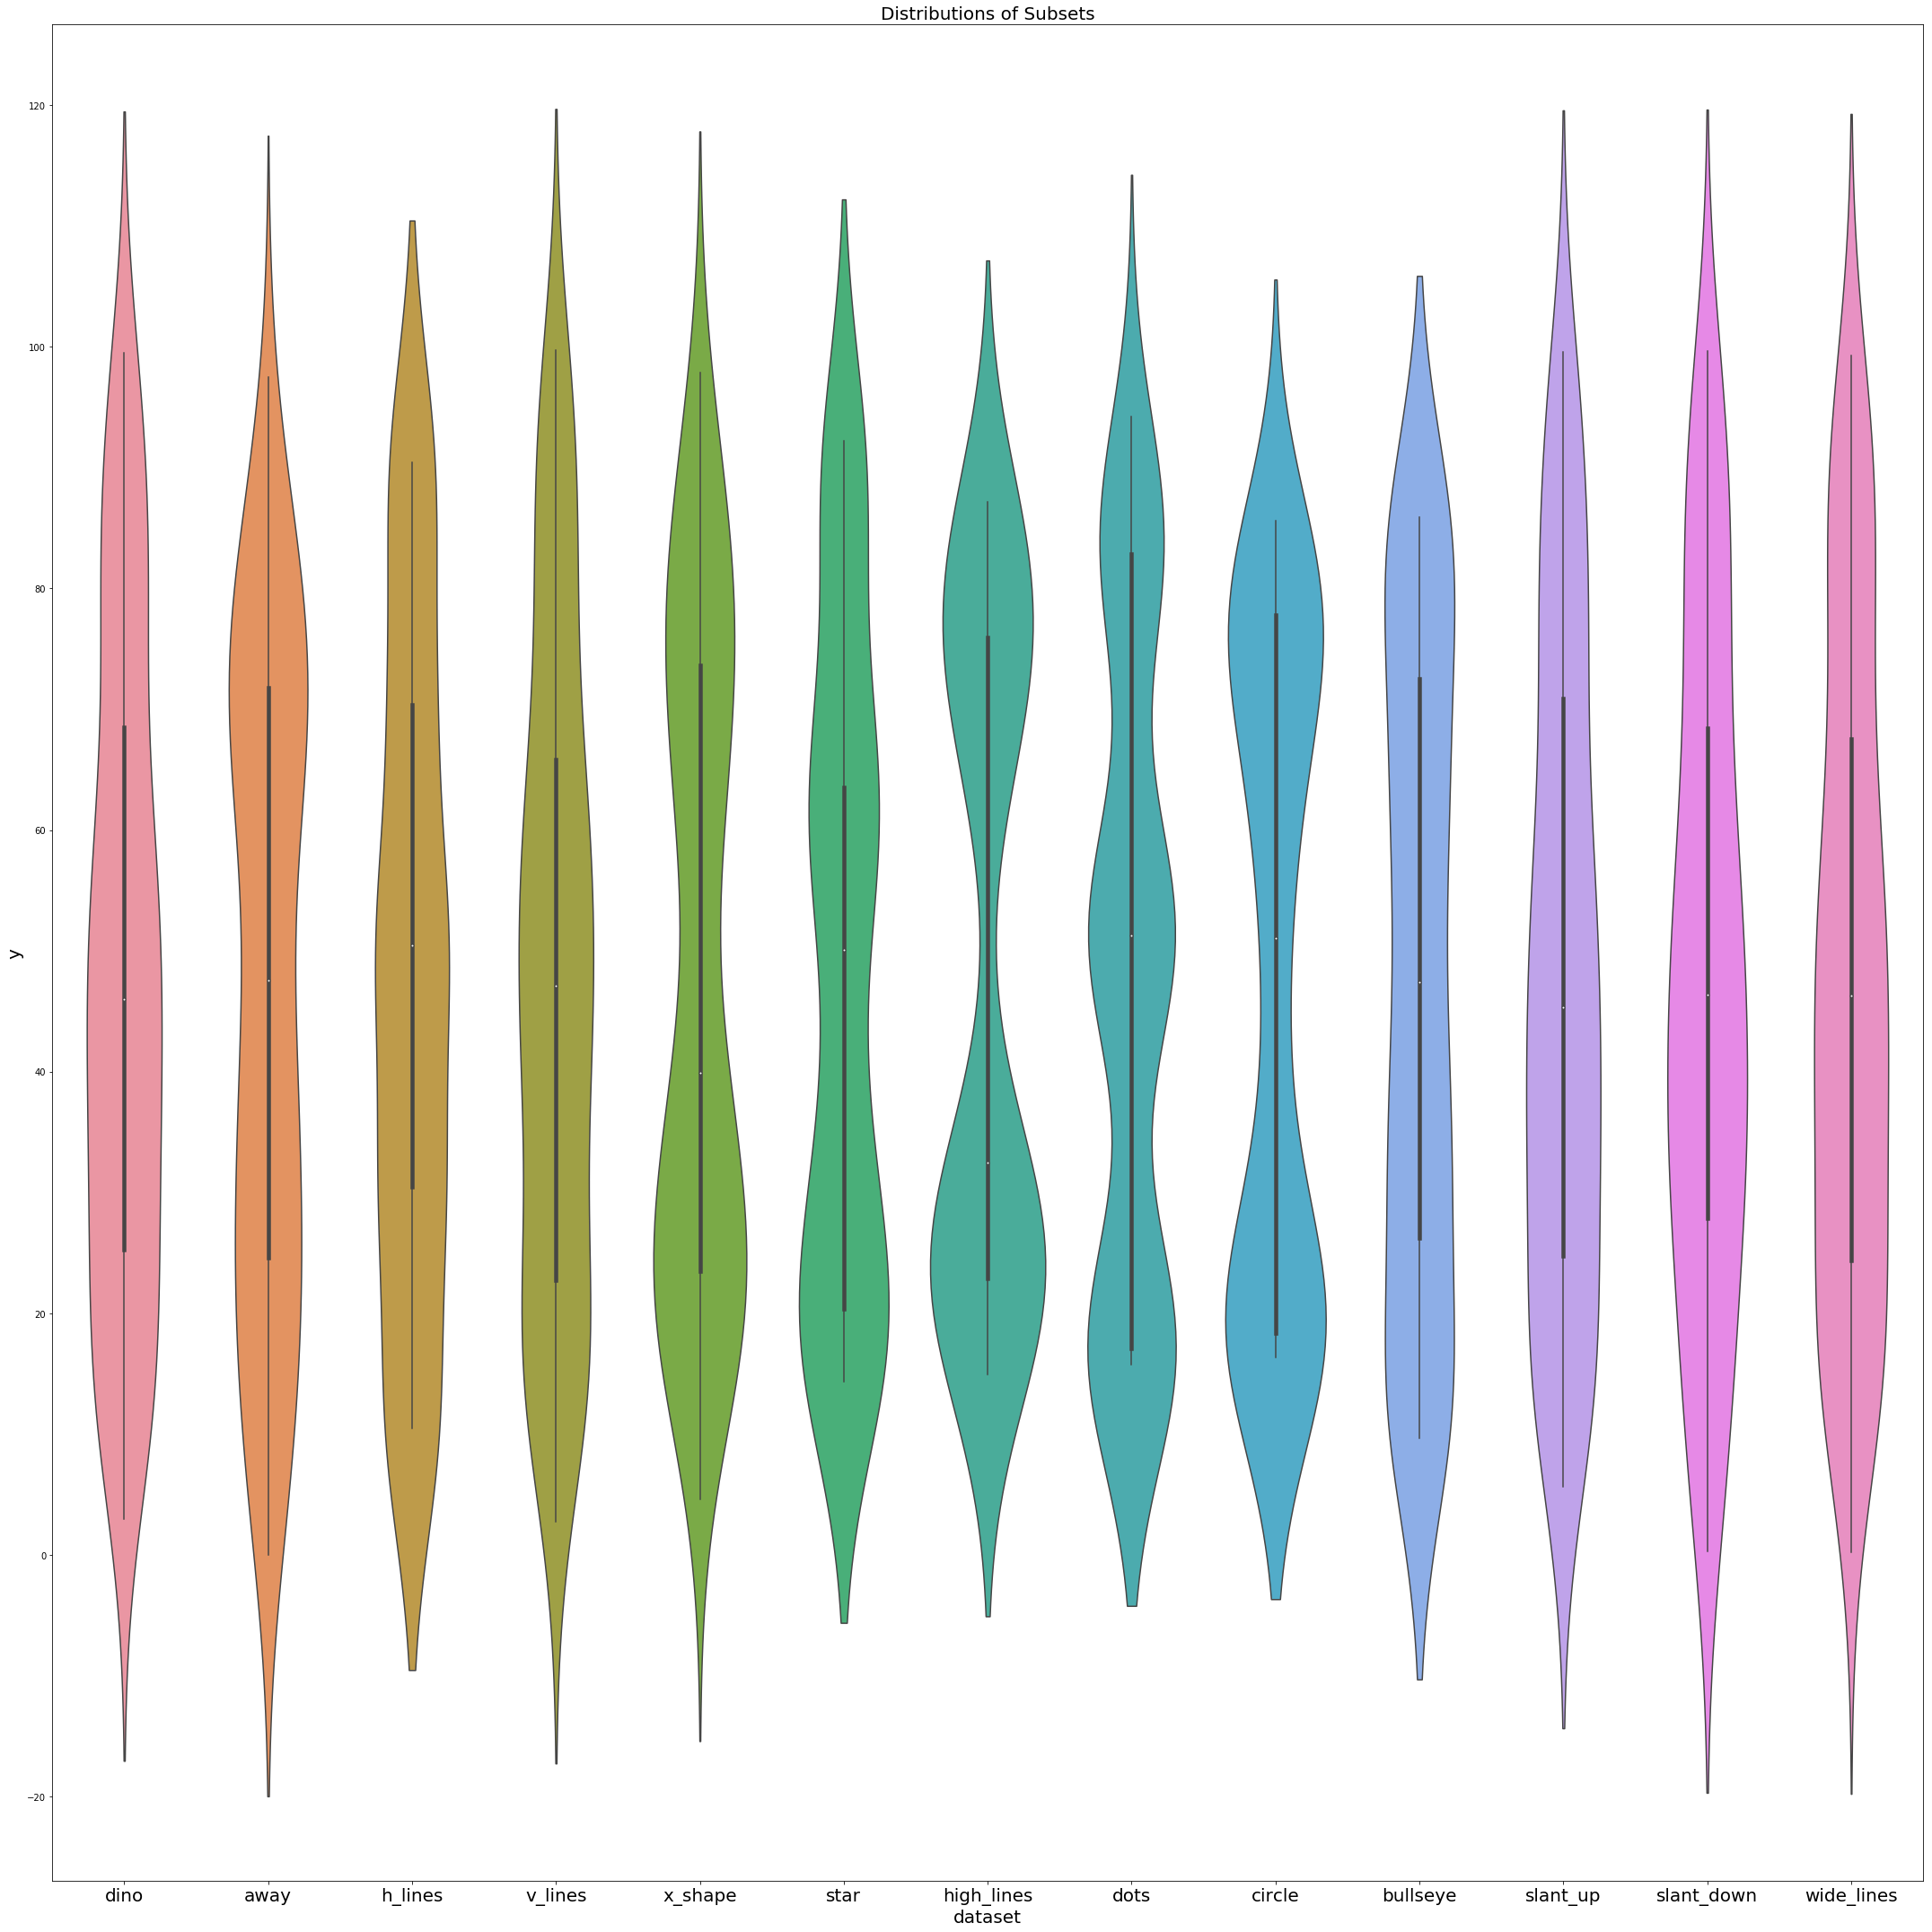

In [11]:
f, ax = plt.subplots(figsize = (30,30))

plt.title("Distributions of Subsets", )
sns.violinplot(ax = ax, x = 'dataset', y = 'y', data=tablesaur)
plt.tight_layout()

## Wide lines subset

In [12]:
wide_linestable = tablesaur.loc[tablesaur["dataset"] == "wide_lines"]
wide_linestable.drop('dataset', axis = 1).head()

,x,y
1704,65.815540,95.588374
1705,65.672265,91.933402
1706,39.002716,92.261838
1707,37.795303,93.532455
1708,35.513901,89.599190


Text(0.5, 1.0, 'Wide Lines')

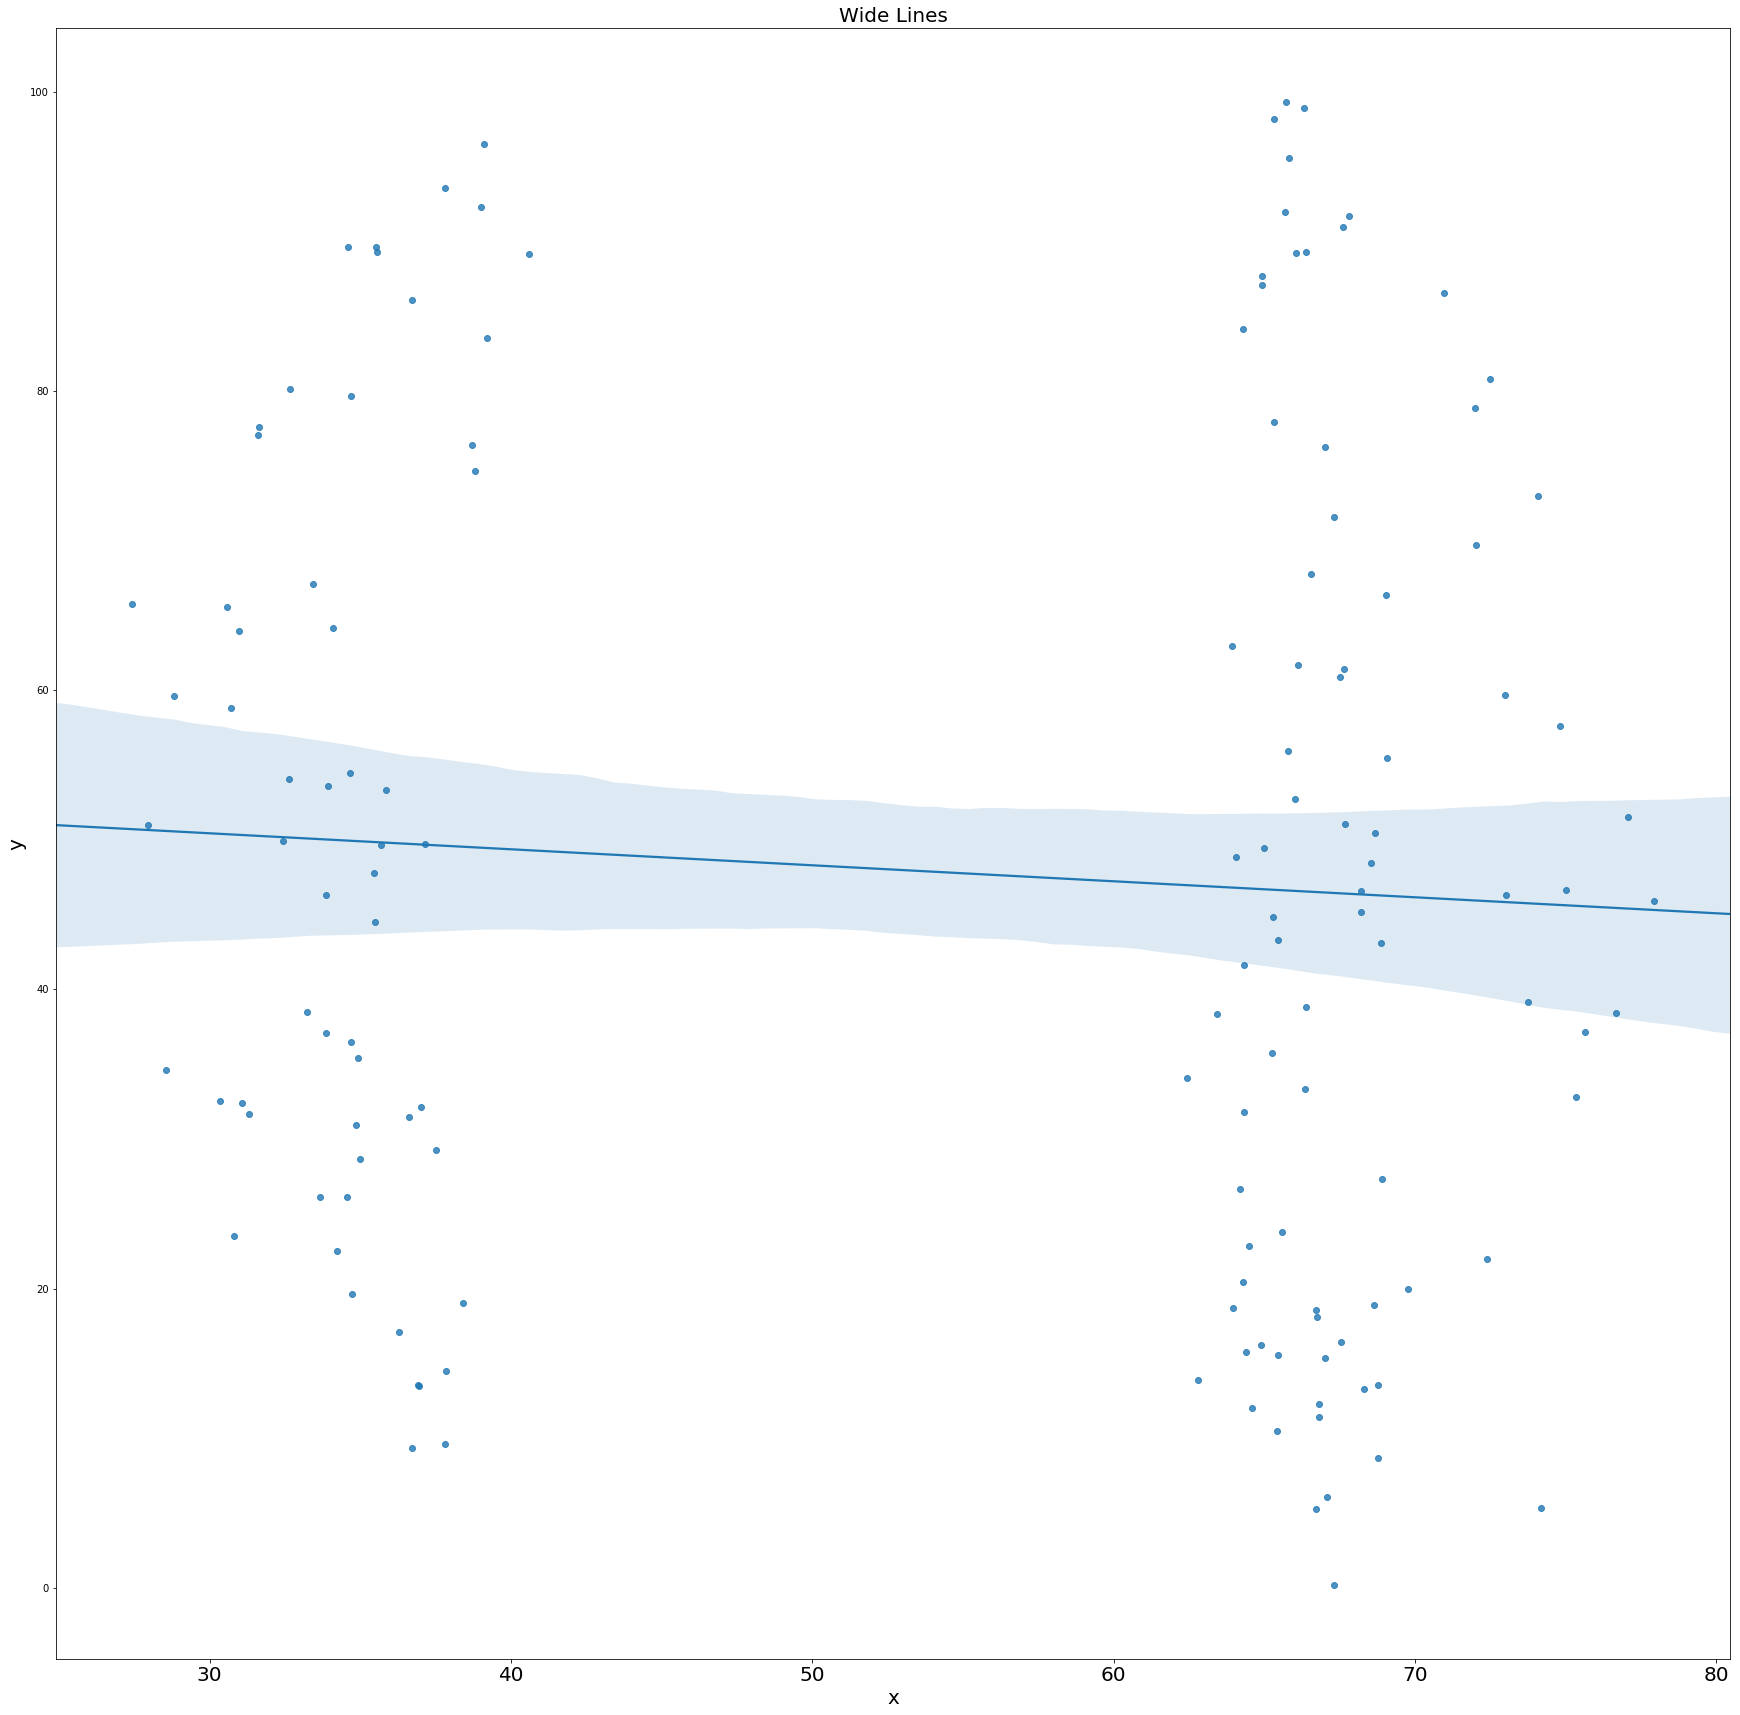

In [13]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = wide_linestable)
plt.title("Wide Lines")

In [14]:
f1 = "y~x"
model = ols(formula = f1, data = wide_linestable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6233
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.431
Time:                        15:24:56   Log-Likelihood:                -668.35
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.6349      7.691      6.973      0.000      38.428      68.841
x             -0.1069      0.135     -0.789      0.431      -0.375       0.161
==============================================================================
Omnibus:                       30.522   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.362
Skew:                           0.271   Prob(JB):                       0.0153
Kurtosis:                       1.942   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Slant down subset

In [15]:
slant_downtable = tablesaur.loc[tablesaur["dataset"] == "slant_down"]
slant_downtable.drop('dataset', axis = 1).head()

,x,y
1562,52.872021,97.343223
1563,59.014144,93.574875
1564,56.375109,96.305148
1565,37.839200,94.359444
1566,39.885373,90.634662


Text(0.5, 1.0, 'Slant Down')

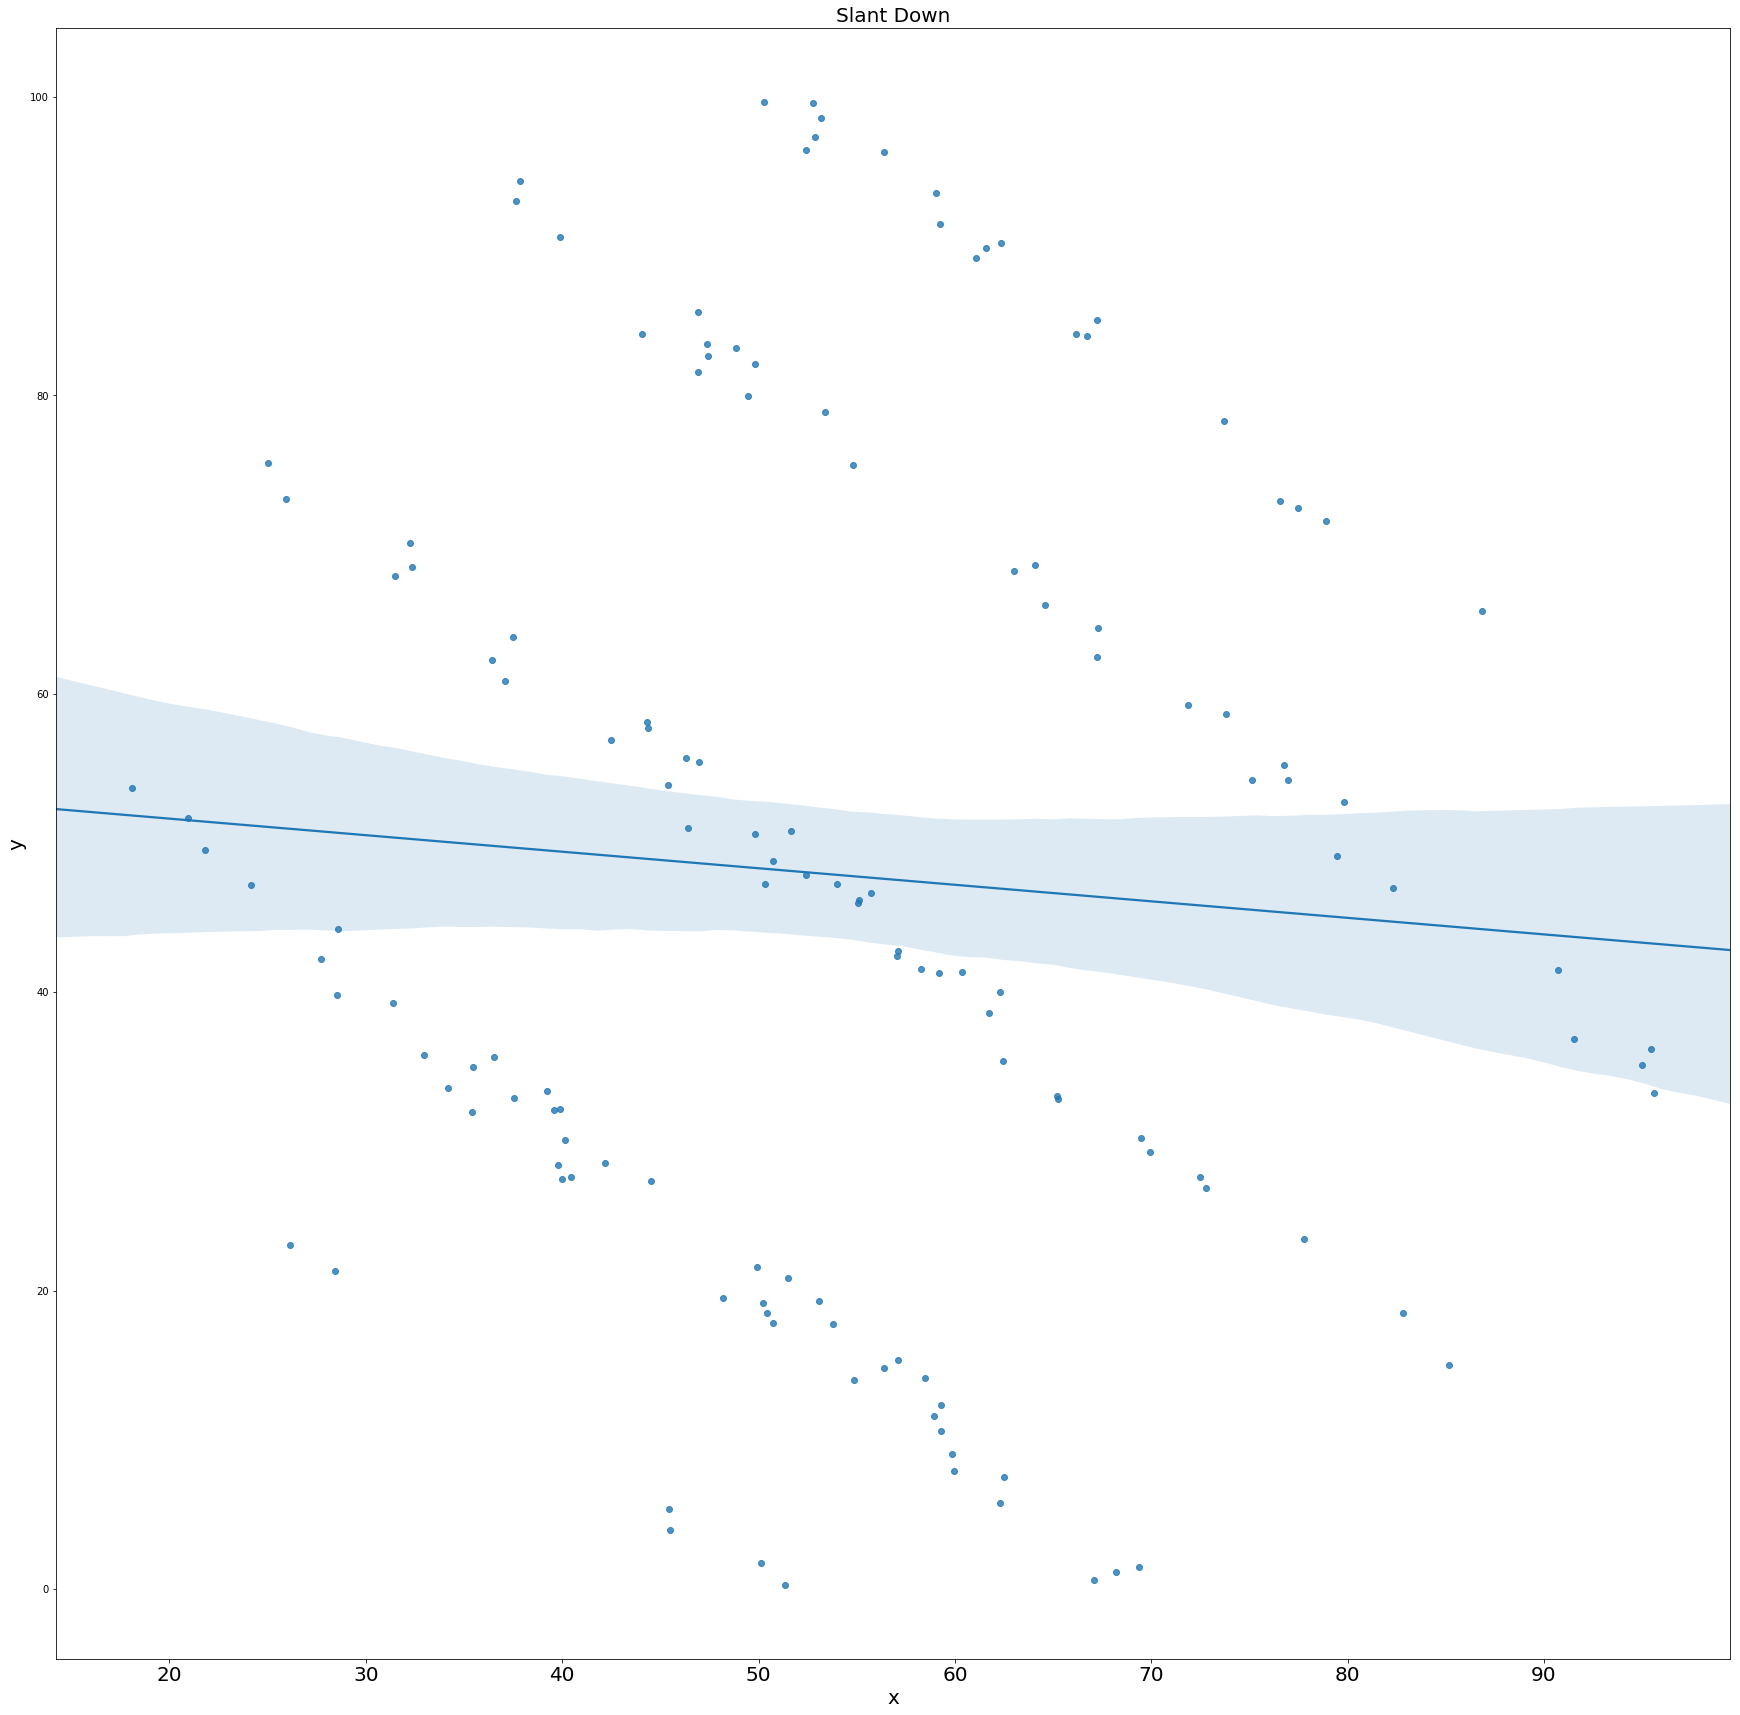

In [16]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = slant_downtable)
plt.title("Slant Down")

In [17]:
f1 = "y~x"
model = ols(formula = f1, data = slant_downtable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6693
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.415
Time:                        15:24:57   Log-Likelihood:                -668.32
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8497      7.691      7.001      0.000      38.644      69.056
x             -0.1108      0.135     -0.818      0.415      -0.379       0.157
==============================================================================
Omnibus:                       17.797   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.128
Skew:                           0.198   Prob(JB):                       0.0467
Kurtosis:                       2.062   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Slant up subset with amalgamation paradox

In [18]:
slant_uptable = tablesaur.loc[tablesaur["dataset"] == "slant_up"]
slant_uptable.drop('dataset', axis = 1).head()

,x,y
1420,47.695201,95.241187
1421,44.609976,93.075835
1422,43.856381,94.085872
1423,41.578929,90.303567
1424,49.177419,96.610532


Text(0.5, 1.0, 'Slant Up')

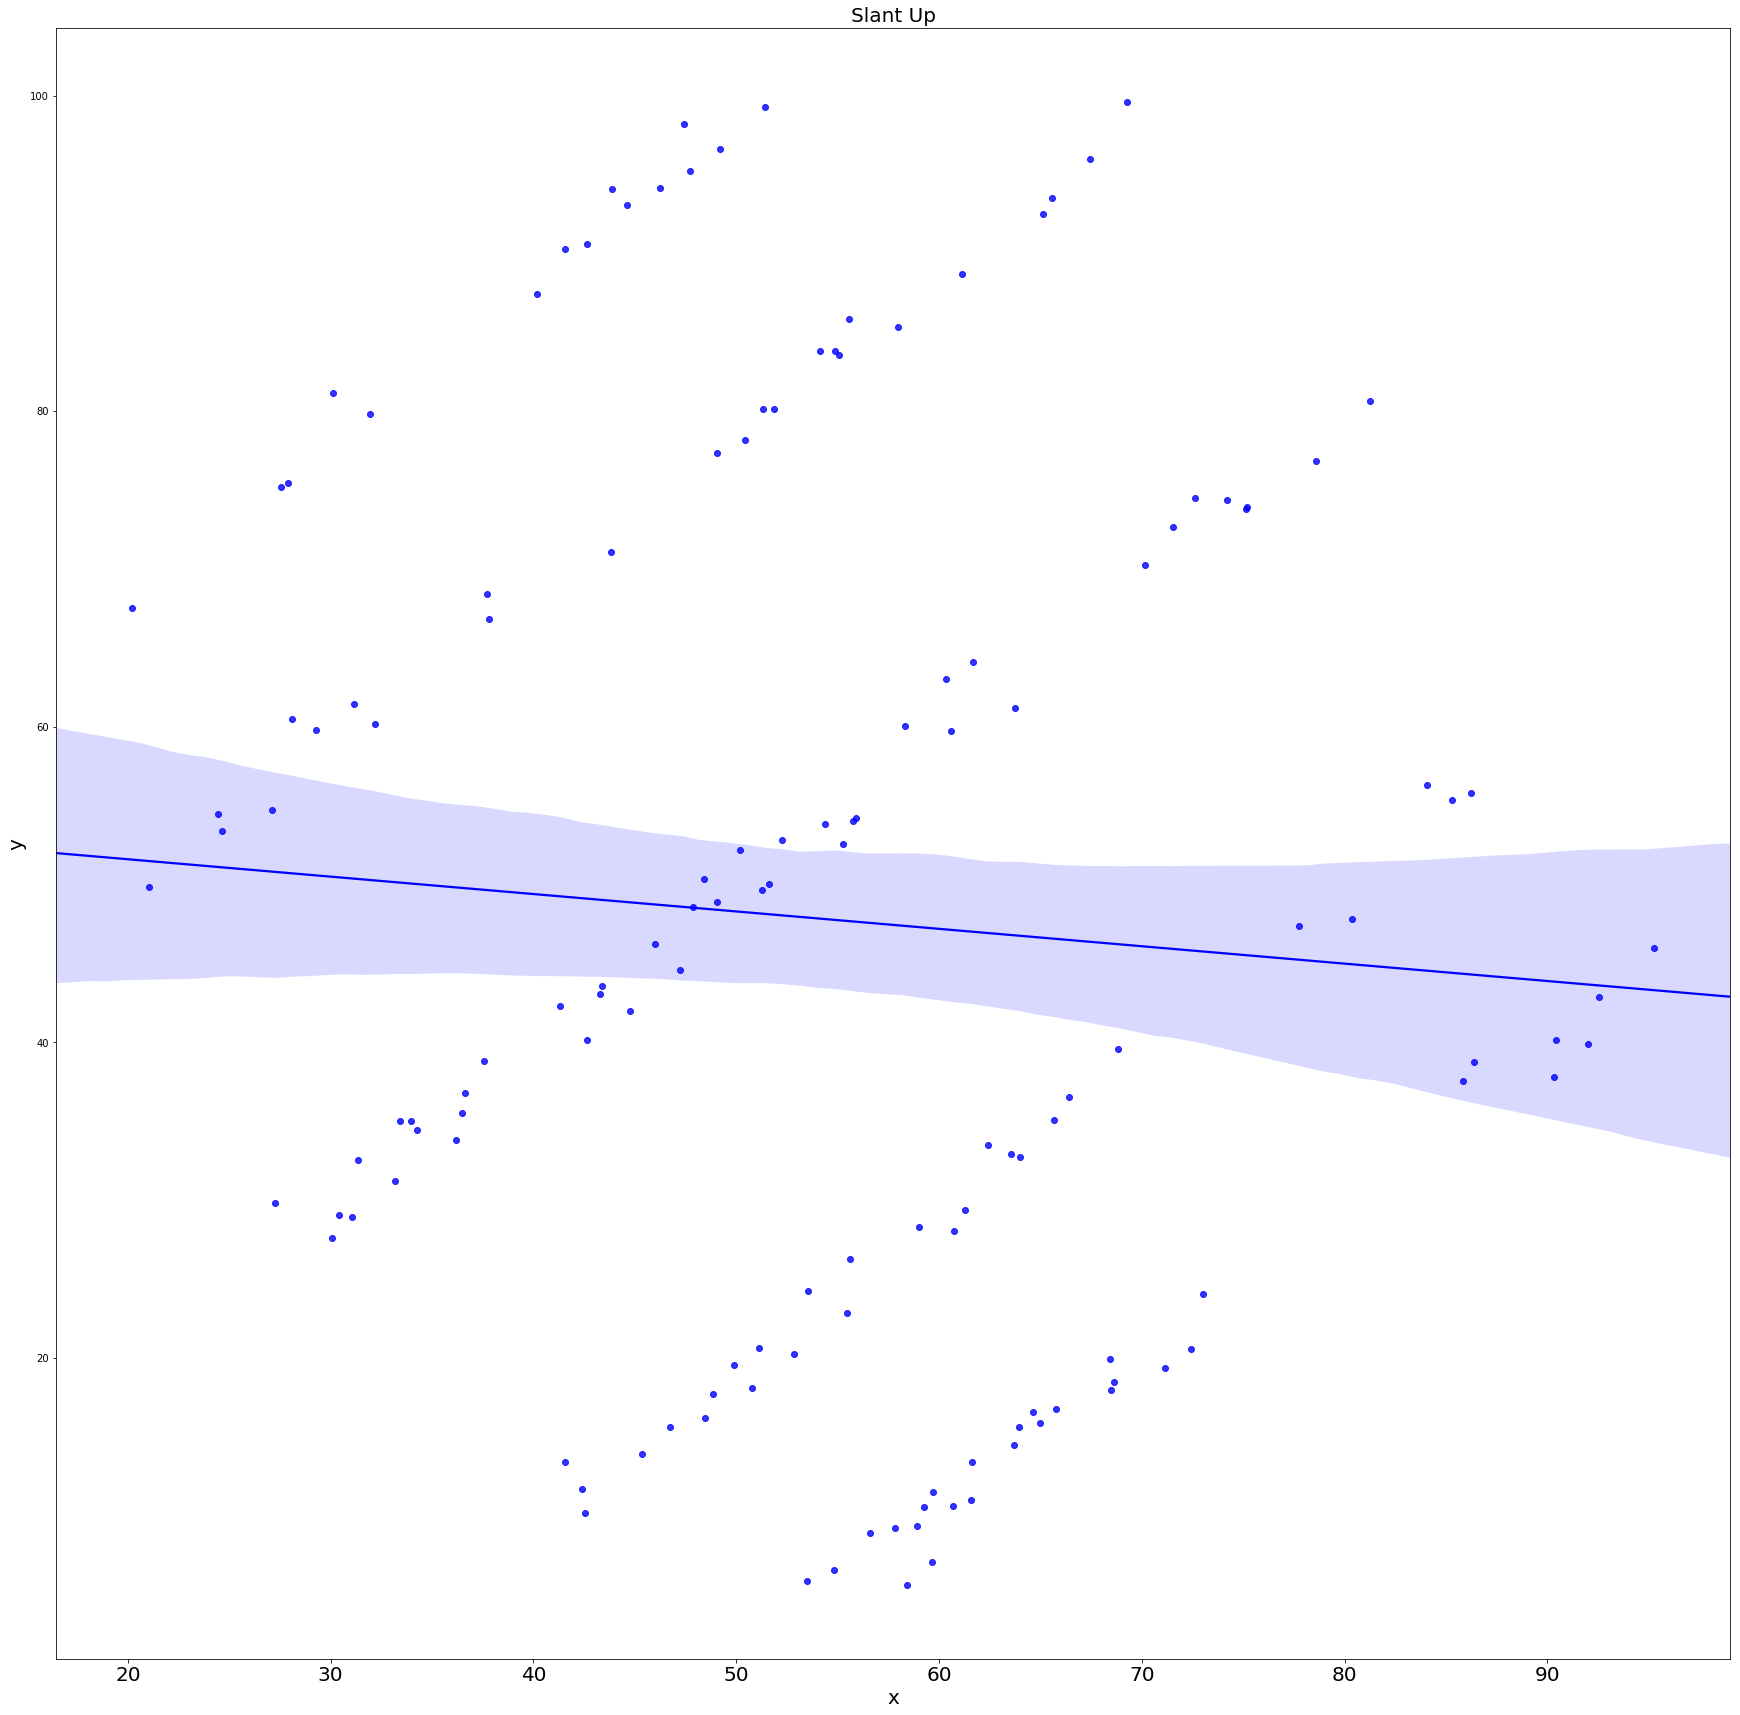

In [19]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = slant_uptable, color = 'b')
plt.title("Slant Up")

In [20]:
f1 = "y~x"
model = ols(formula = f1, data = slant_uptable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6621
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.417
Time:                        15:24:57   Log-Likelihood:                -668.34
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8126      7.691      6.997      0.000      38.607      69.018
x             -0.1102      0.135     -0.814      0.417      -0.378       0.158
==============================================================================
Omnibus:                       31.038   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.330
Skew:                           0.264   Prob(JB):                       0.0155
Kurtosis:                       1.937   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
one_line = slant_uptable.iloc[20:40]


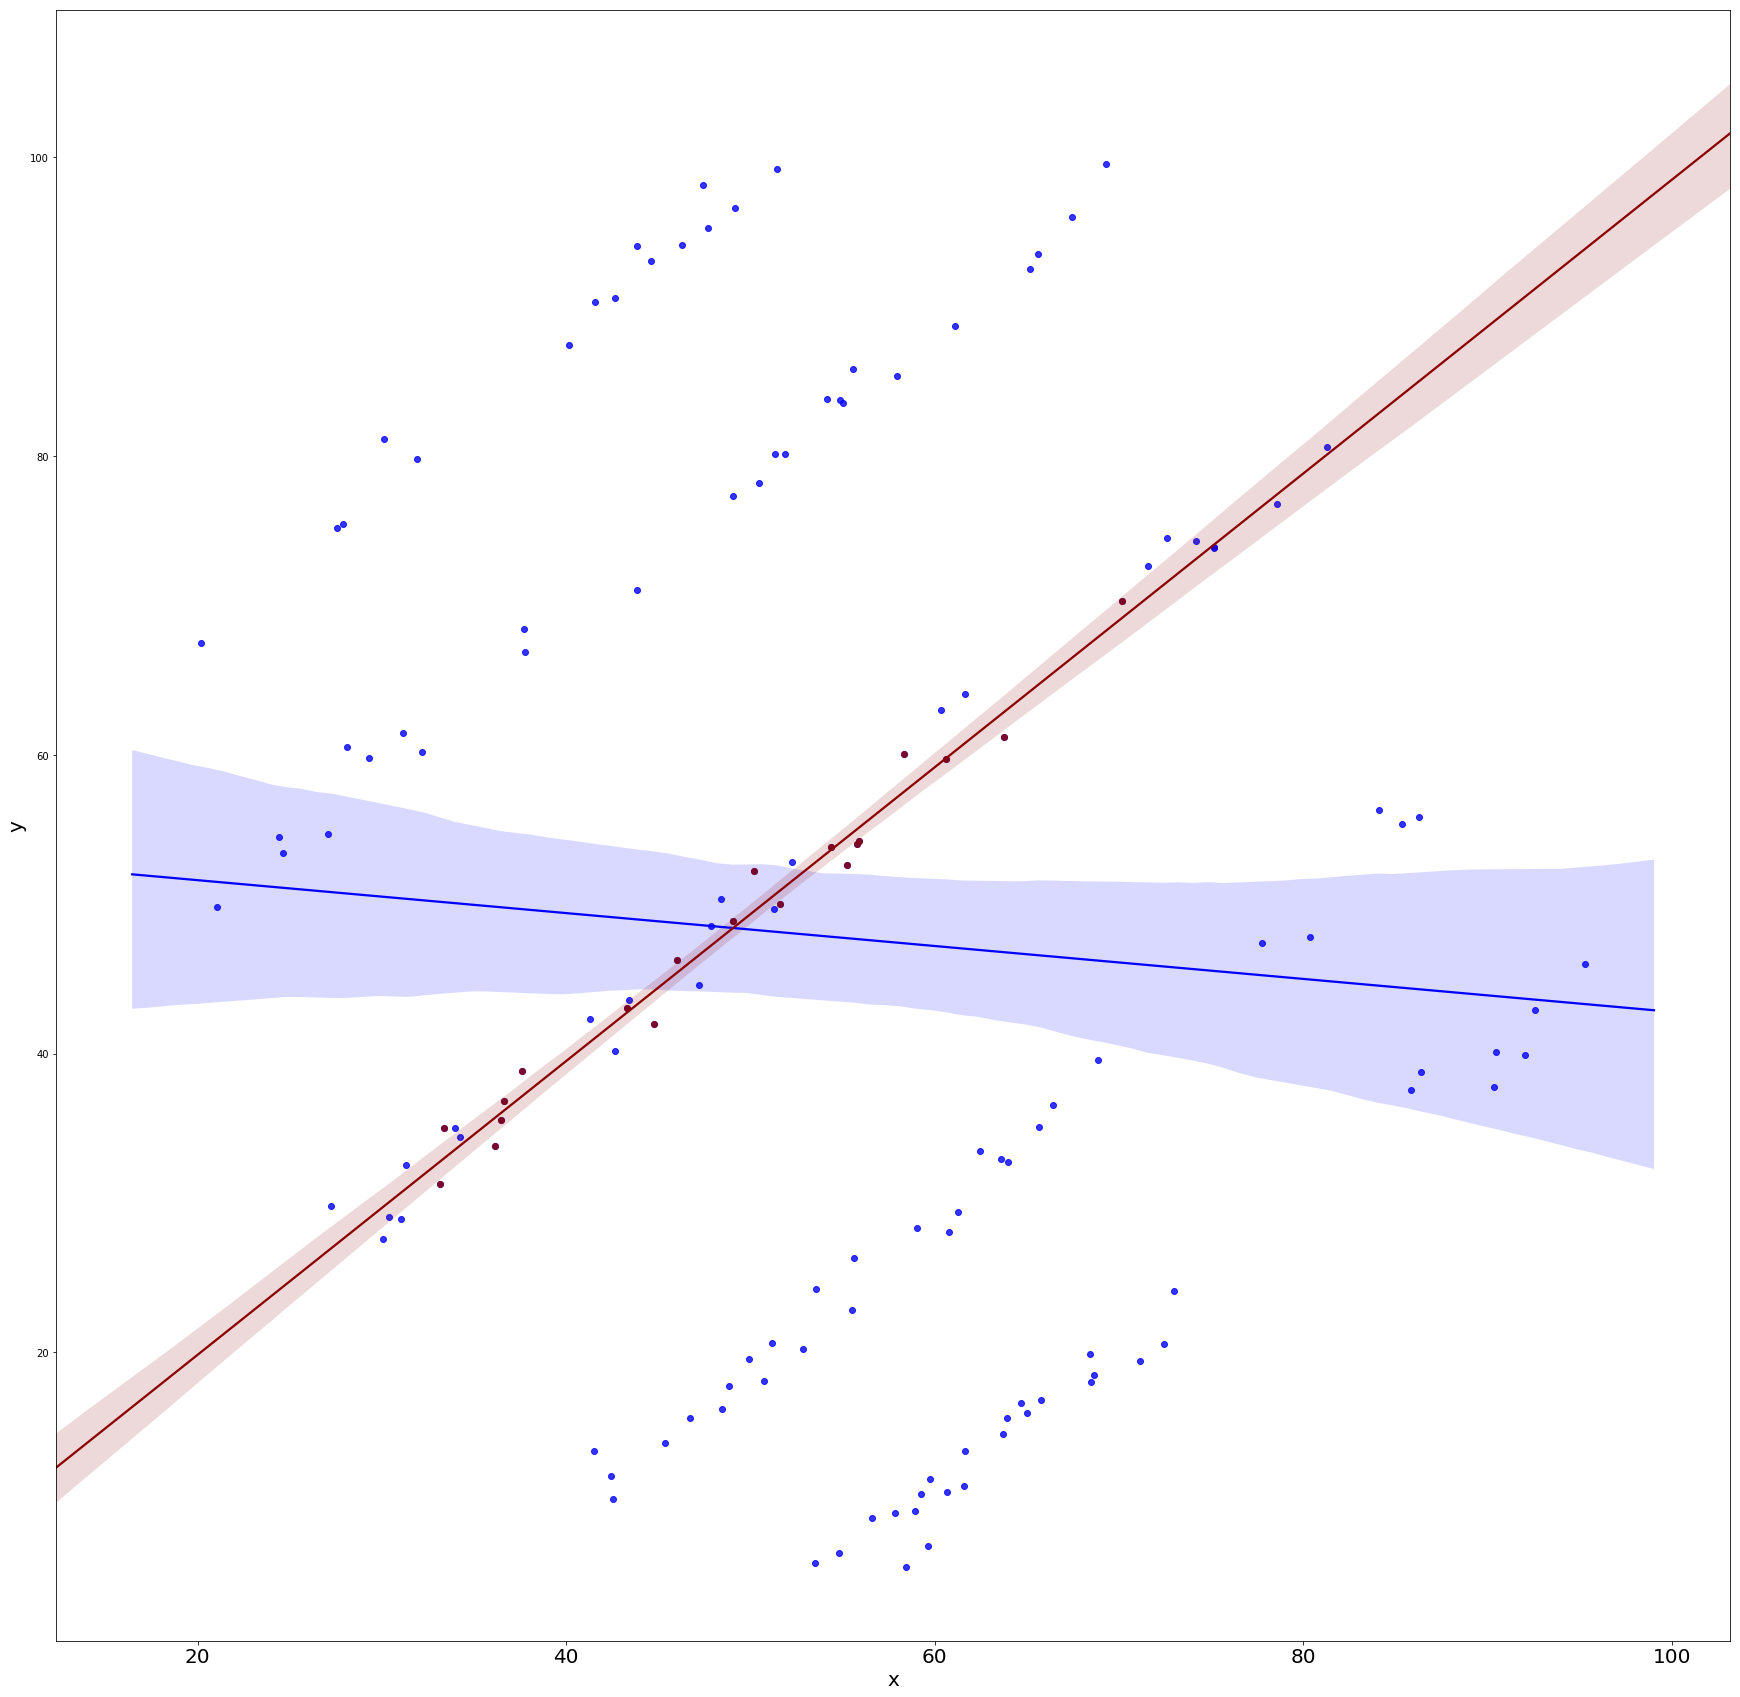

In [22]:
f, ax = plt.subplots(figsize = (30,30))
sns.regplot(x = "x", y = "y", data = slant_uptable, color = 'b')
sns.regplot(x = "x", y = "y", data = one_line, color = 'darkred')


In [23]:
f1 = "y~x"
model = ols(formula = f1, data = one_line).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     891.0
Date:                Mon, 20 May 2019   Prob (F-statistic):           8.76e-17
Time:                        15:24:58   Log-Likelihood:                -36.097
No. Observations:                  20   AIC:                             76.19
Df Residuals:                      18   BIC:                             78.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1505      1.640      0.092      0.928      -3.294       3.595
x              0.9837      0.033     29.849      0.000       0.914       1.053
==============================================================================
Omnibus:                        1.689   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.072
Skew:                           0.245   Prob(JB):                        0.585
Kurtosis:                       1.977   Cond. No.                         235.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bullseye subset

In [24]:
bullseyetable = tablesaur.loc[tablesaur["dataset"] == "bullseye"]
bullseyetable.drop('dataset', axis = 1).head()

,x,y
1278,51.203891,83.339777
1279,58.974470,85.499818
1280,51.872073,85.829738
1281,48.179931,85.045117
1282,41.683200,84.017941


Text(0.5, 1.0, 'BullsEye')

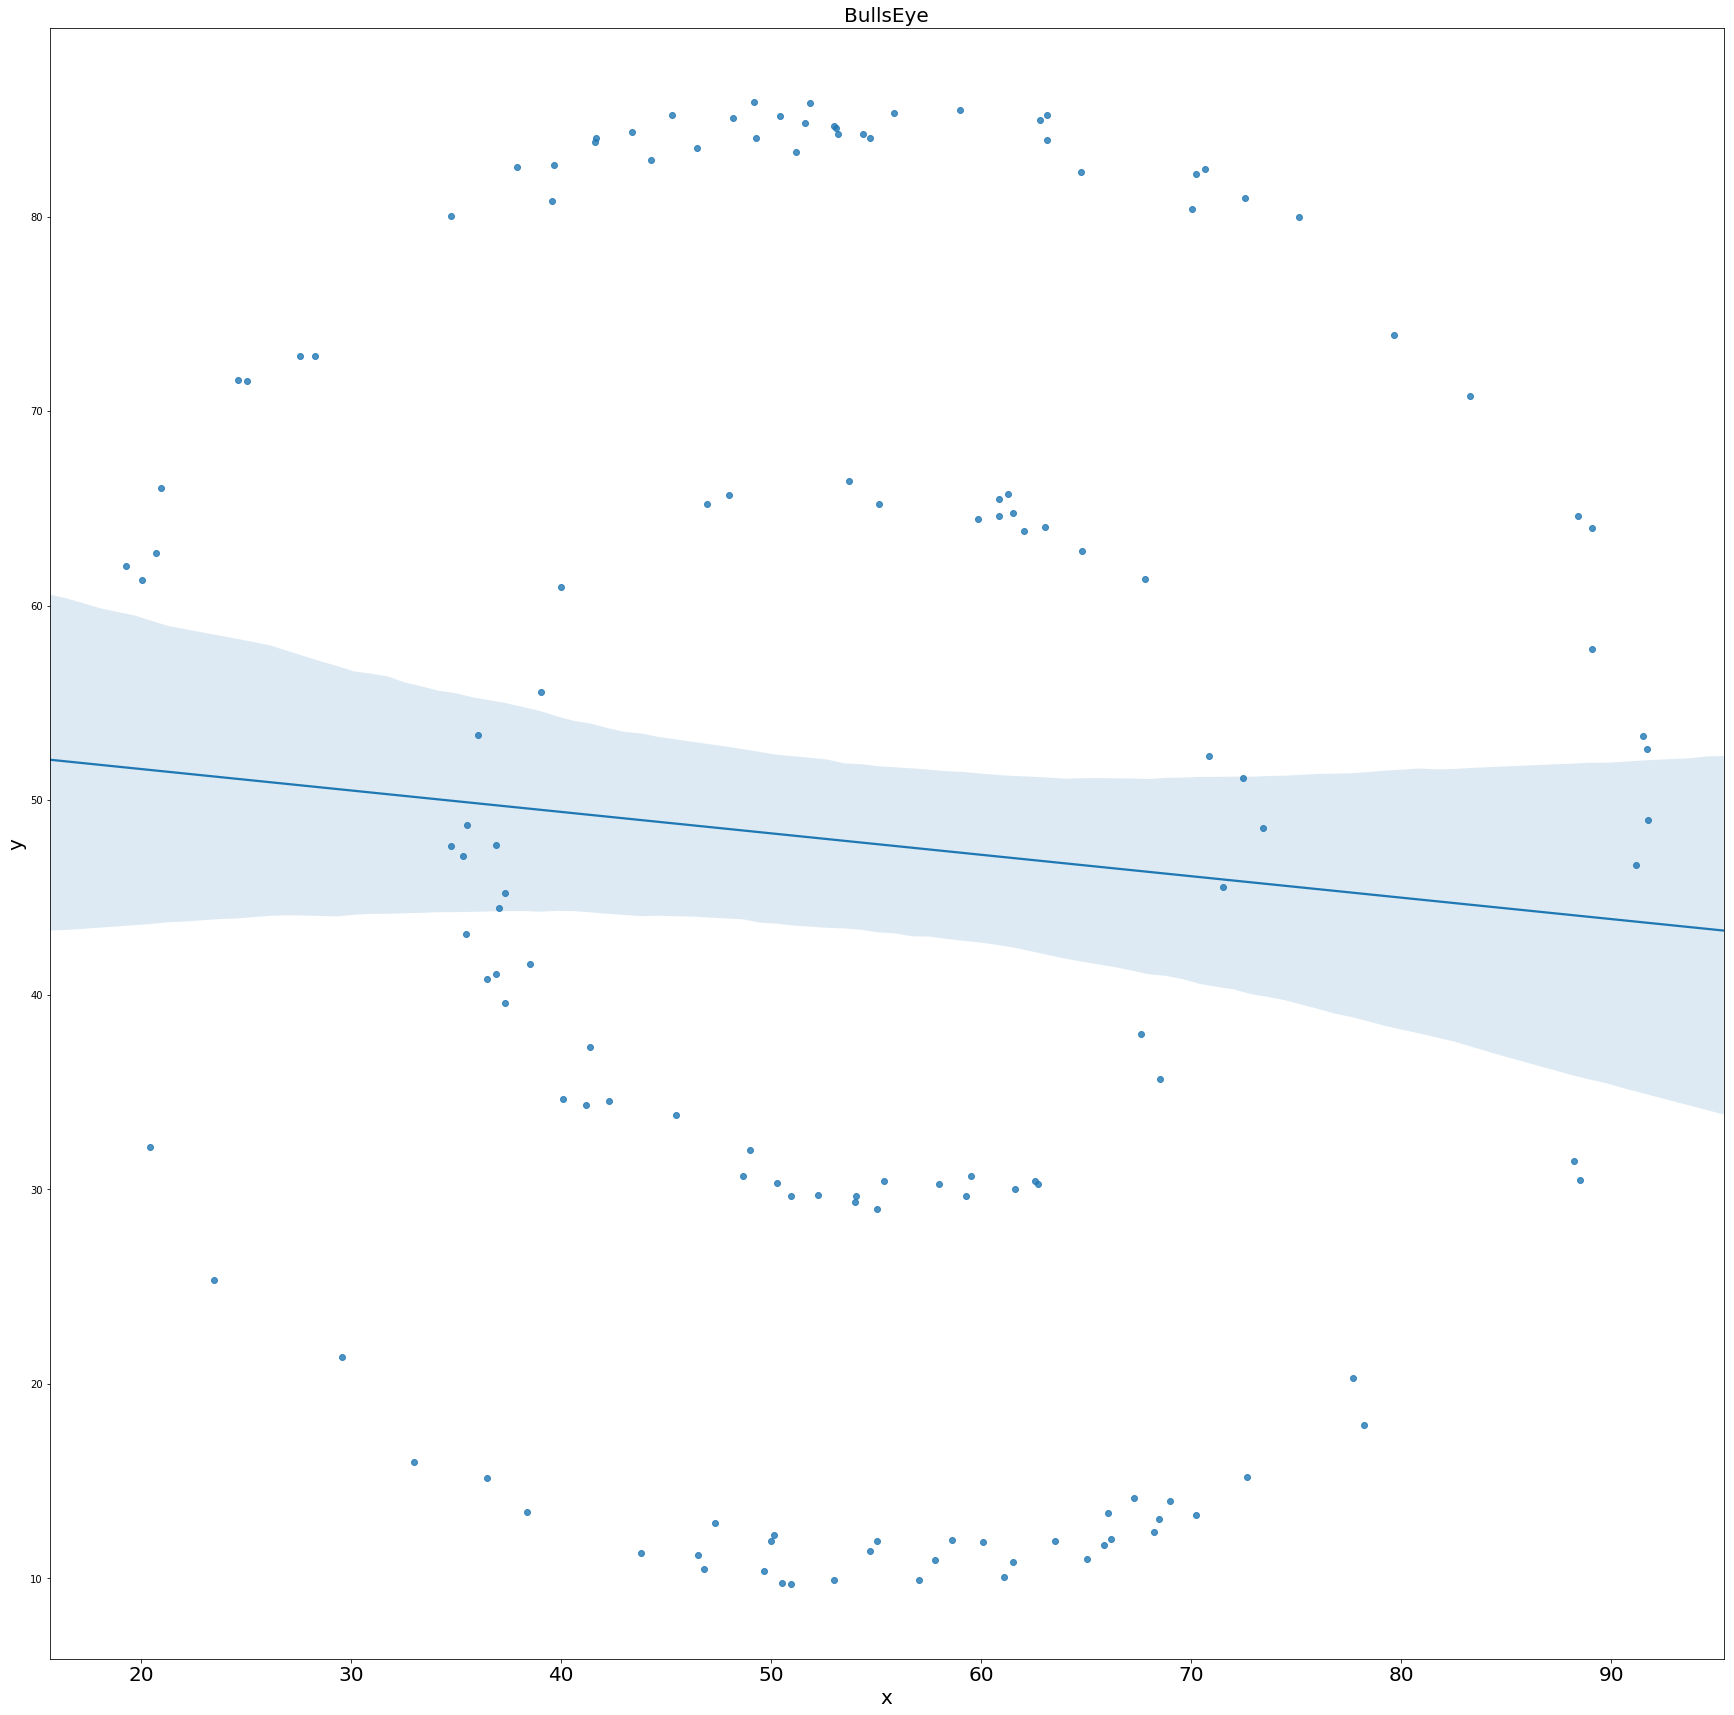

In [25]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = bullseyetable)
plt.title("BullsEye")

In [26]:
f1 = "y~x"
model = ols(formula = f1, data = bullseyetable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6617
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.417
Time:                        15:24:58   Log-Likelihood:                -668.32
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8095      7.690      6.997      0.000      38.605      69.014
x             -0.1102      0.135     -0.813      0.417      -0.378       0.158
==============================================================================
Omnibus:                      292.759   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.233
Skew:                           0.017   Prob(JB):                      0.00221
Kurtosis:                       1.563   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Circle subset

In [27]:
circletable = tablesaur.loc[tablesaur["dataset"] == "circle"]
circletable.drop('dataset', axis = 1).head()

,x,y
1136,55.993030,79.277264
1137,50.032254,79.013071
1138,51.288459,82.435940
1139,51.170537,79.165294
1140,44.377915,78.164628


Text(0.5, 1.0, 'Circle')

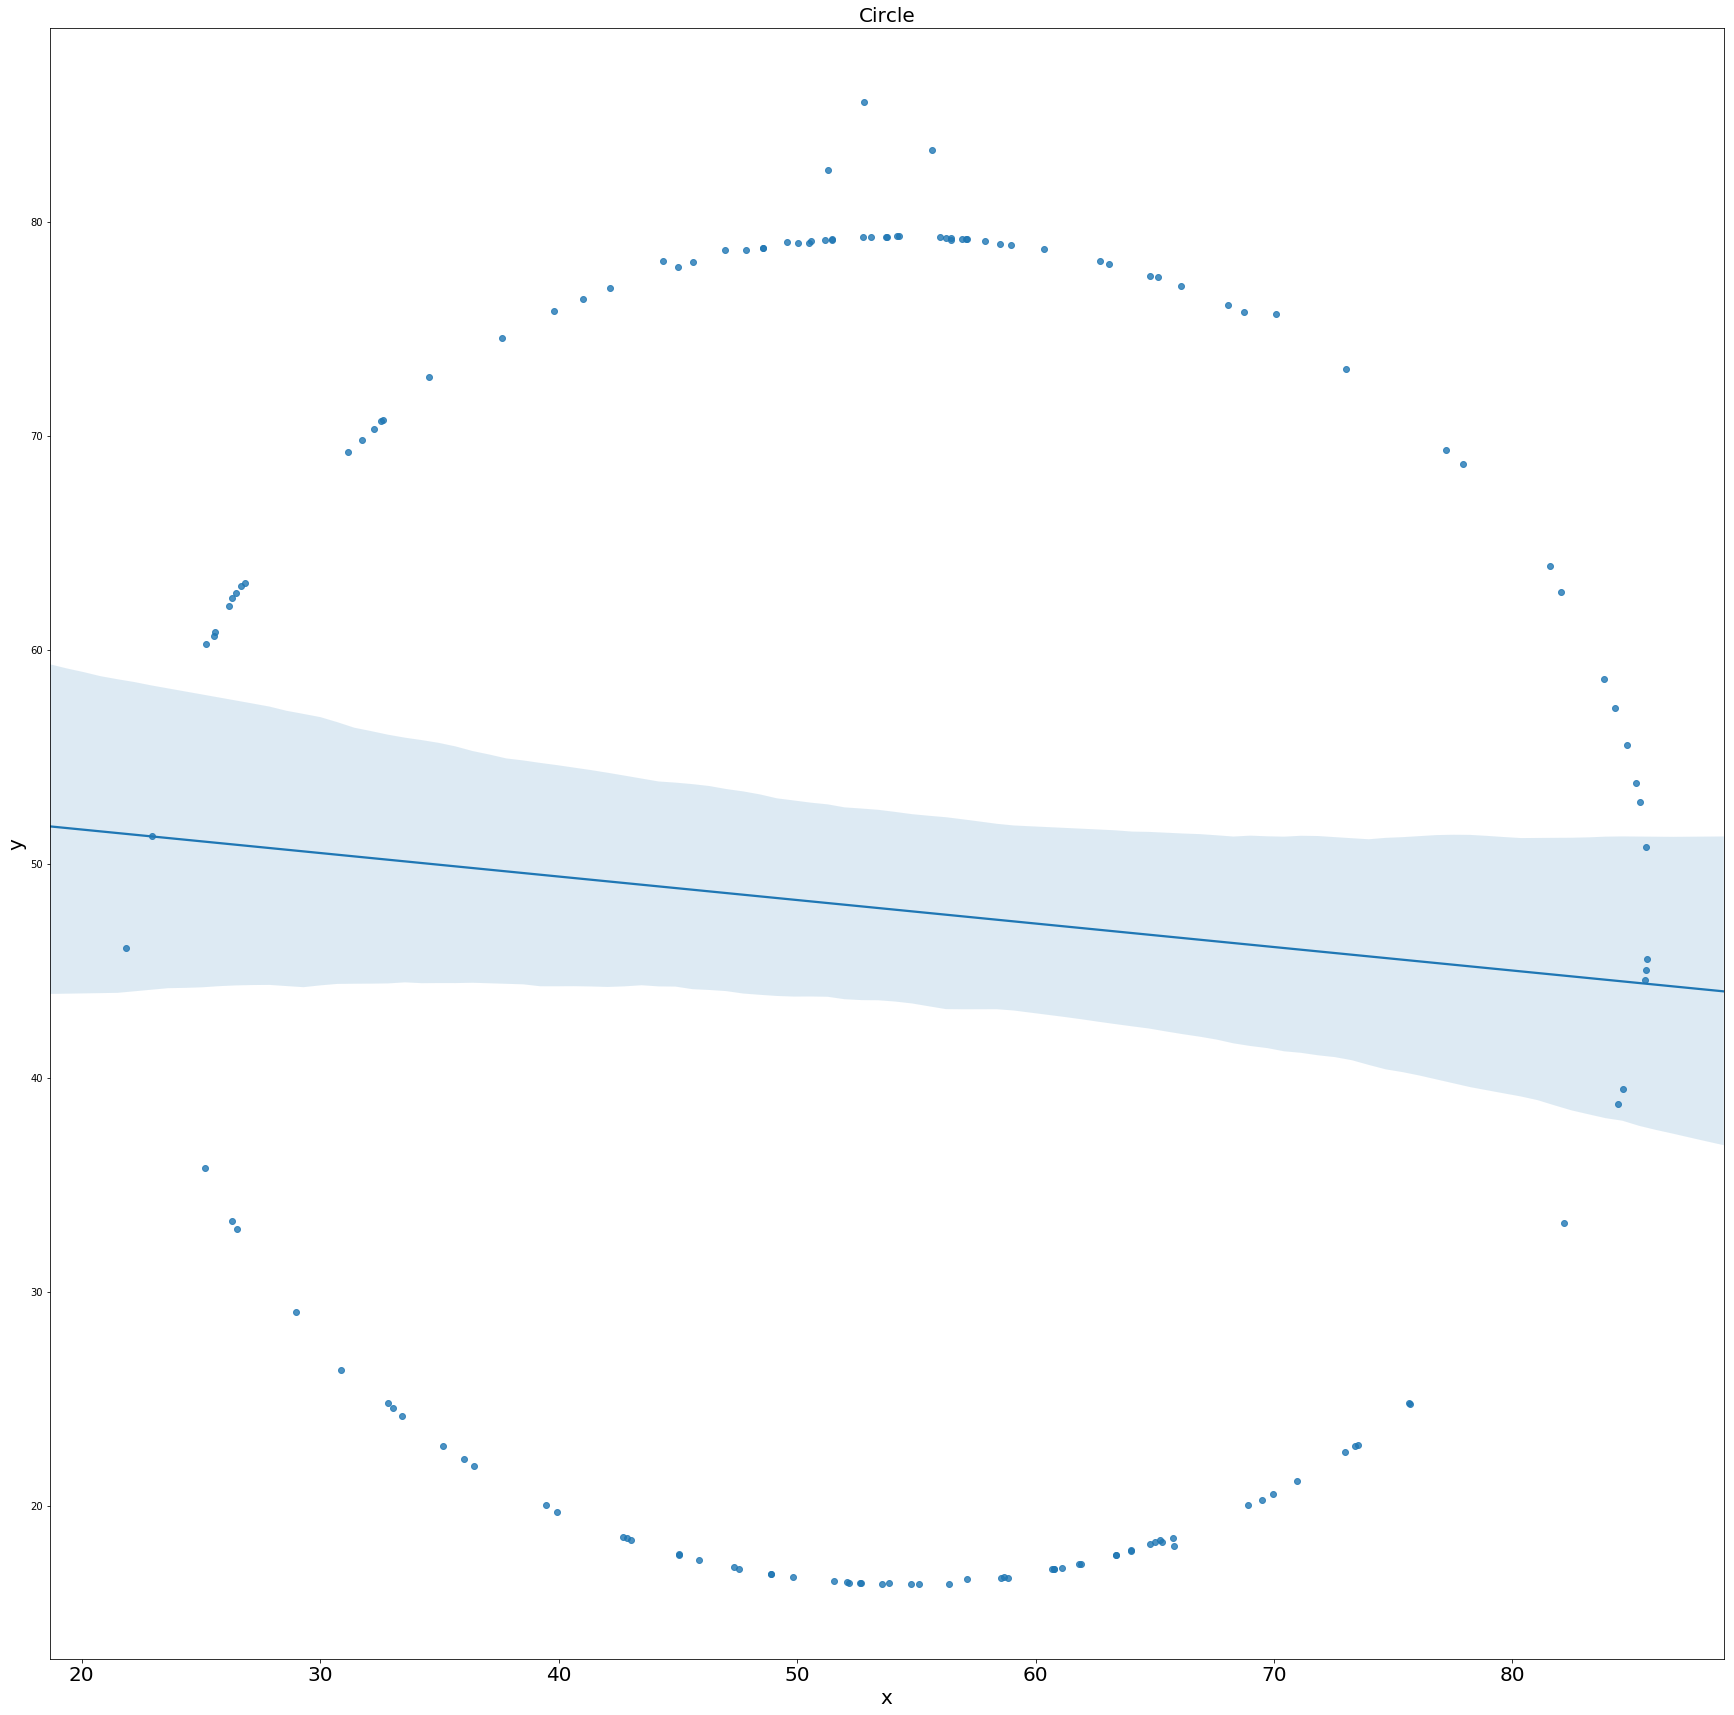

In [28]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = circletable)
plt.title("Circle")

In [29]:
f1 = "y~x"
model = ols(formula = f1, data = circletable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6570
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.419
Time:                        15:24:59   Log-Likelihood:                -668.30
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.7970      7.693      6.993      0.000      38.588      69.006
x             -0.1098      0.135     -0.811      0.419      -0.378       0.158
==============================================================================
Omnibus:                        0.000   Durbin-Watson:                   0.121
Prob(Omnibus):                  1.000   Jarque-Bera (JB):               18.747
Skew:                           0.002   Prob(JB):                     8.49e-05
Kurtosis:                       1.220   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dots subset

In [30]:
dotstable = tablesaur.loc[tablesaur["dataset"] == "dots"]
dotstable.drop('dataset', axis = 1).head()

,x,y
994,51.147917,90.867412
995,50.517126,89.102395
996,50.207480,85.460047
997,50.069482,83.057670
998,50.562846,82.937822


Text(0.5, 1.0, 'Dots')

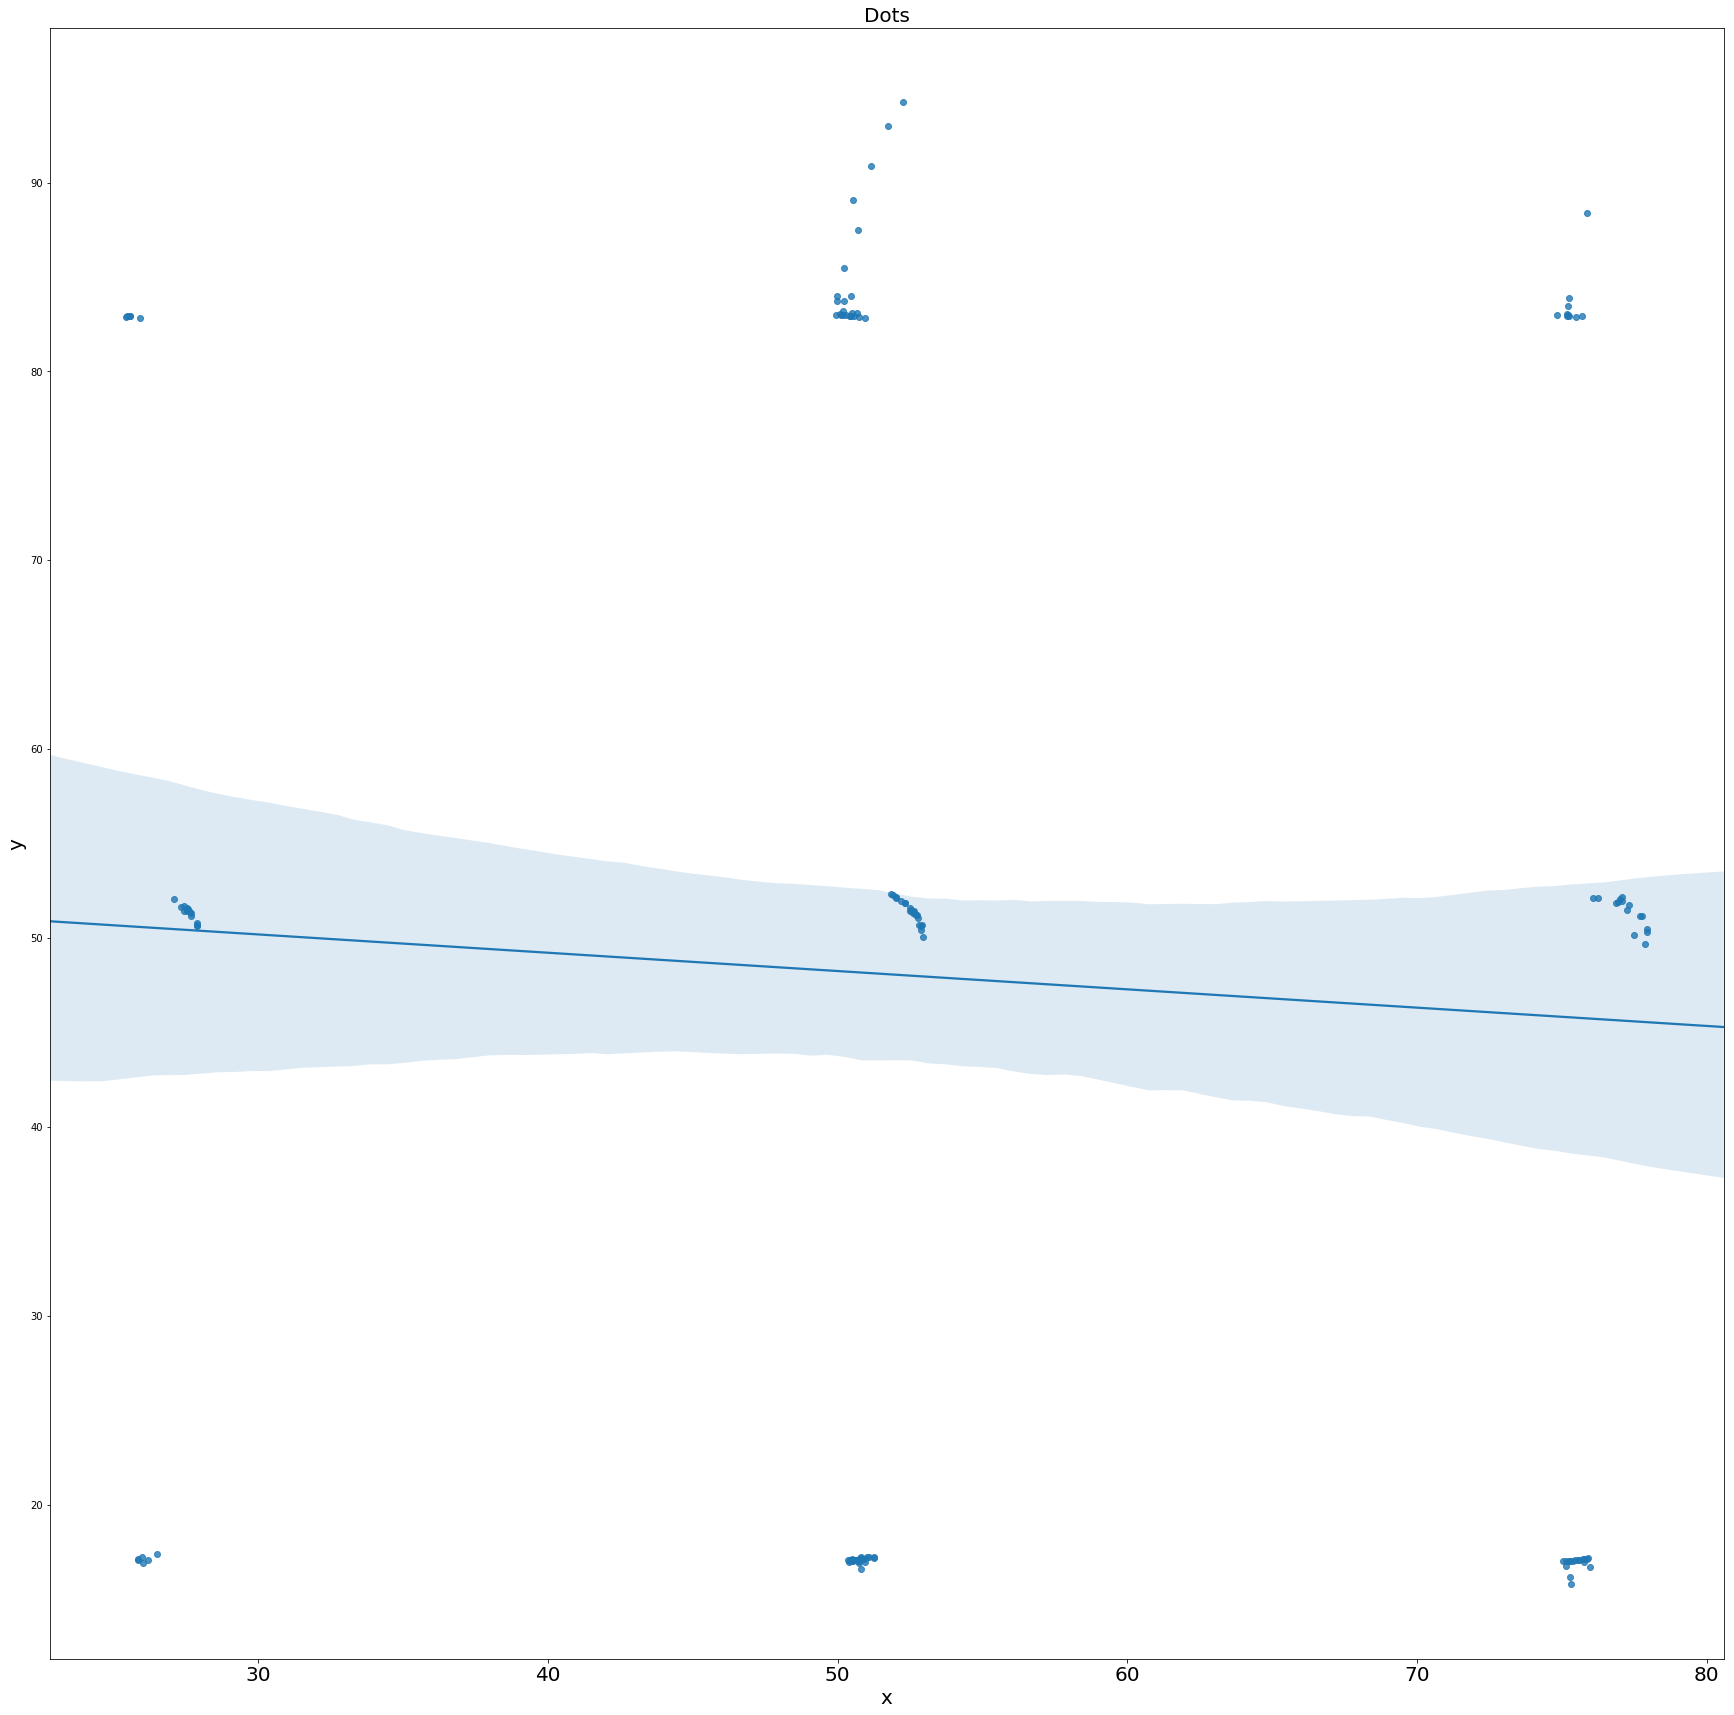

In [31]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = dotstable)
plt.title("Dots")

In [32]:
f1 = "y~x"
model = ols(formula = f1, data = dotstable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5116
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.476
Time:                        15:24:59   Log-Likelihood:                -668.37
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.0983      7.692      6.903      0.000      37.890      68.307
x             -0.0969      0.135     -0.715      0.476      -0.365       0.171
==============================================================================
Omnibus:                      167.336   Durbin-Watson:                   0.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.786
Skew:                           0.157   Prob(JB):                      0.00276
Kurtosis:                       1.624   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## High lines subset

In [33]:
high_linestable = tablesaur.loc[tablesaur["dataset"] == "high_lines"]
high_linestable.drop('dataset', axis = 1).head()

,x,y
852,57.613234,83.905171
853,51.274392,82.817983
854,50.753898,76.754129
855,37.021184,81.954470
856,42.881755,80.184770


Text(0.5, 1.0, 'High Lines')

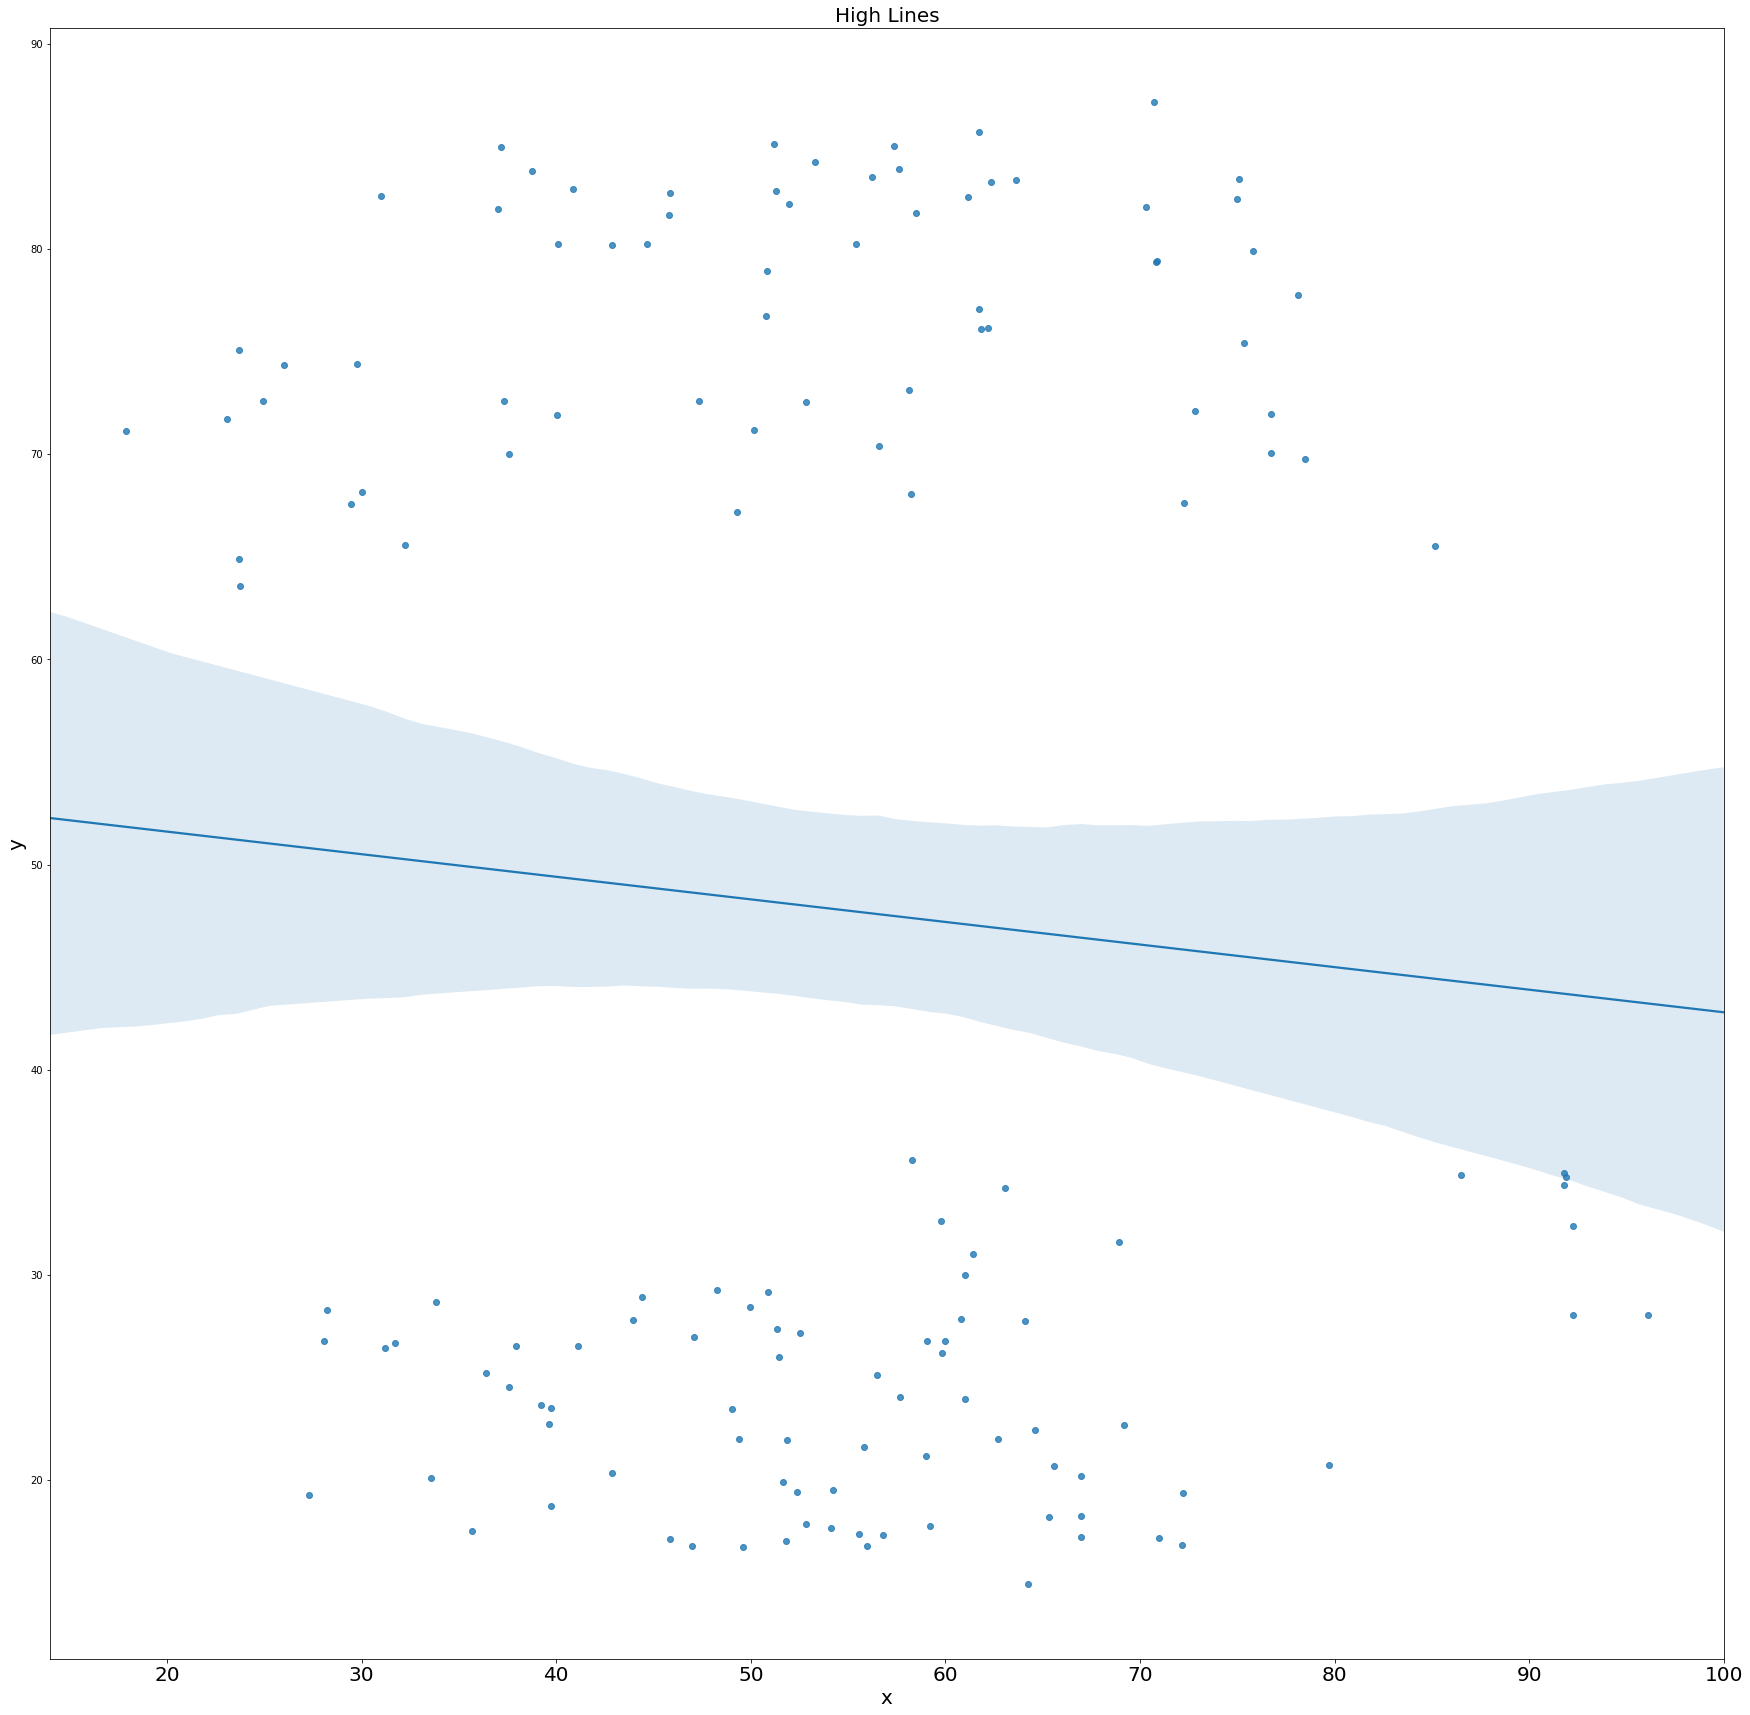

In [34]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = high_linestable)
plt.title("High Lines")

In [35]:
f1 = "y~x"
model = ols(formula = f1, data = high_linestable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6601
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.418
Time:                        15:25:00   Log-Likelihood:                -668.35
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8088      7.693      6.995      0.000      38.600      69.018
x             -0.1101      0.135     -0.812      0.418      -0.378       0.158
==============================================================================
Omnibus:                        1.068   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.586   Jarque-Bera (JB):               19.275
Skew:                           0.205   Prob(JB):                     6.52e-05
Kurtosis:                       1.242   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Star subset

In [36]:
startable = tablesaur.loc[tablesaur["dataset"] == "star"]
startable.drop('dataset', axis = 1).head()

,x,y
710,58.213608,91.881892
711,58.196054,92.214989
712,58.718231,90.310532
713,57.278373,89.907607
714,58.082020,92.008145


Text(0.5, 1.0, 'Star')

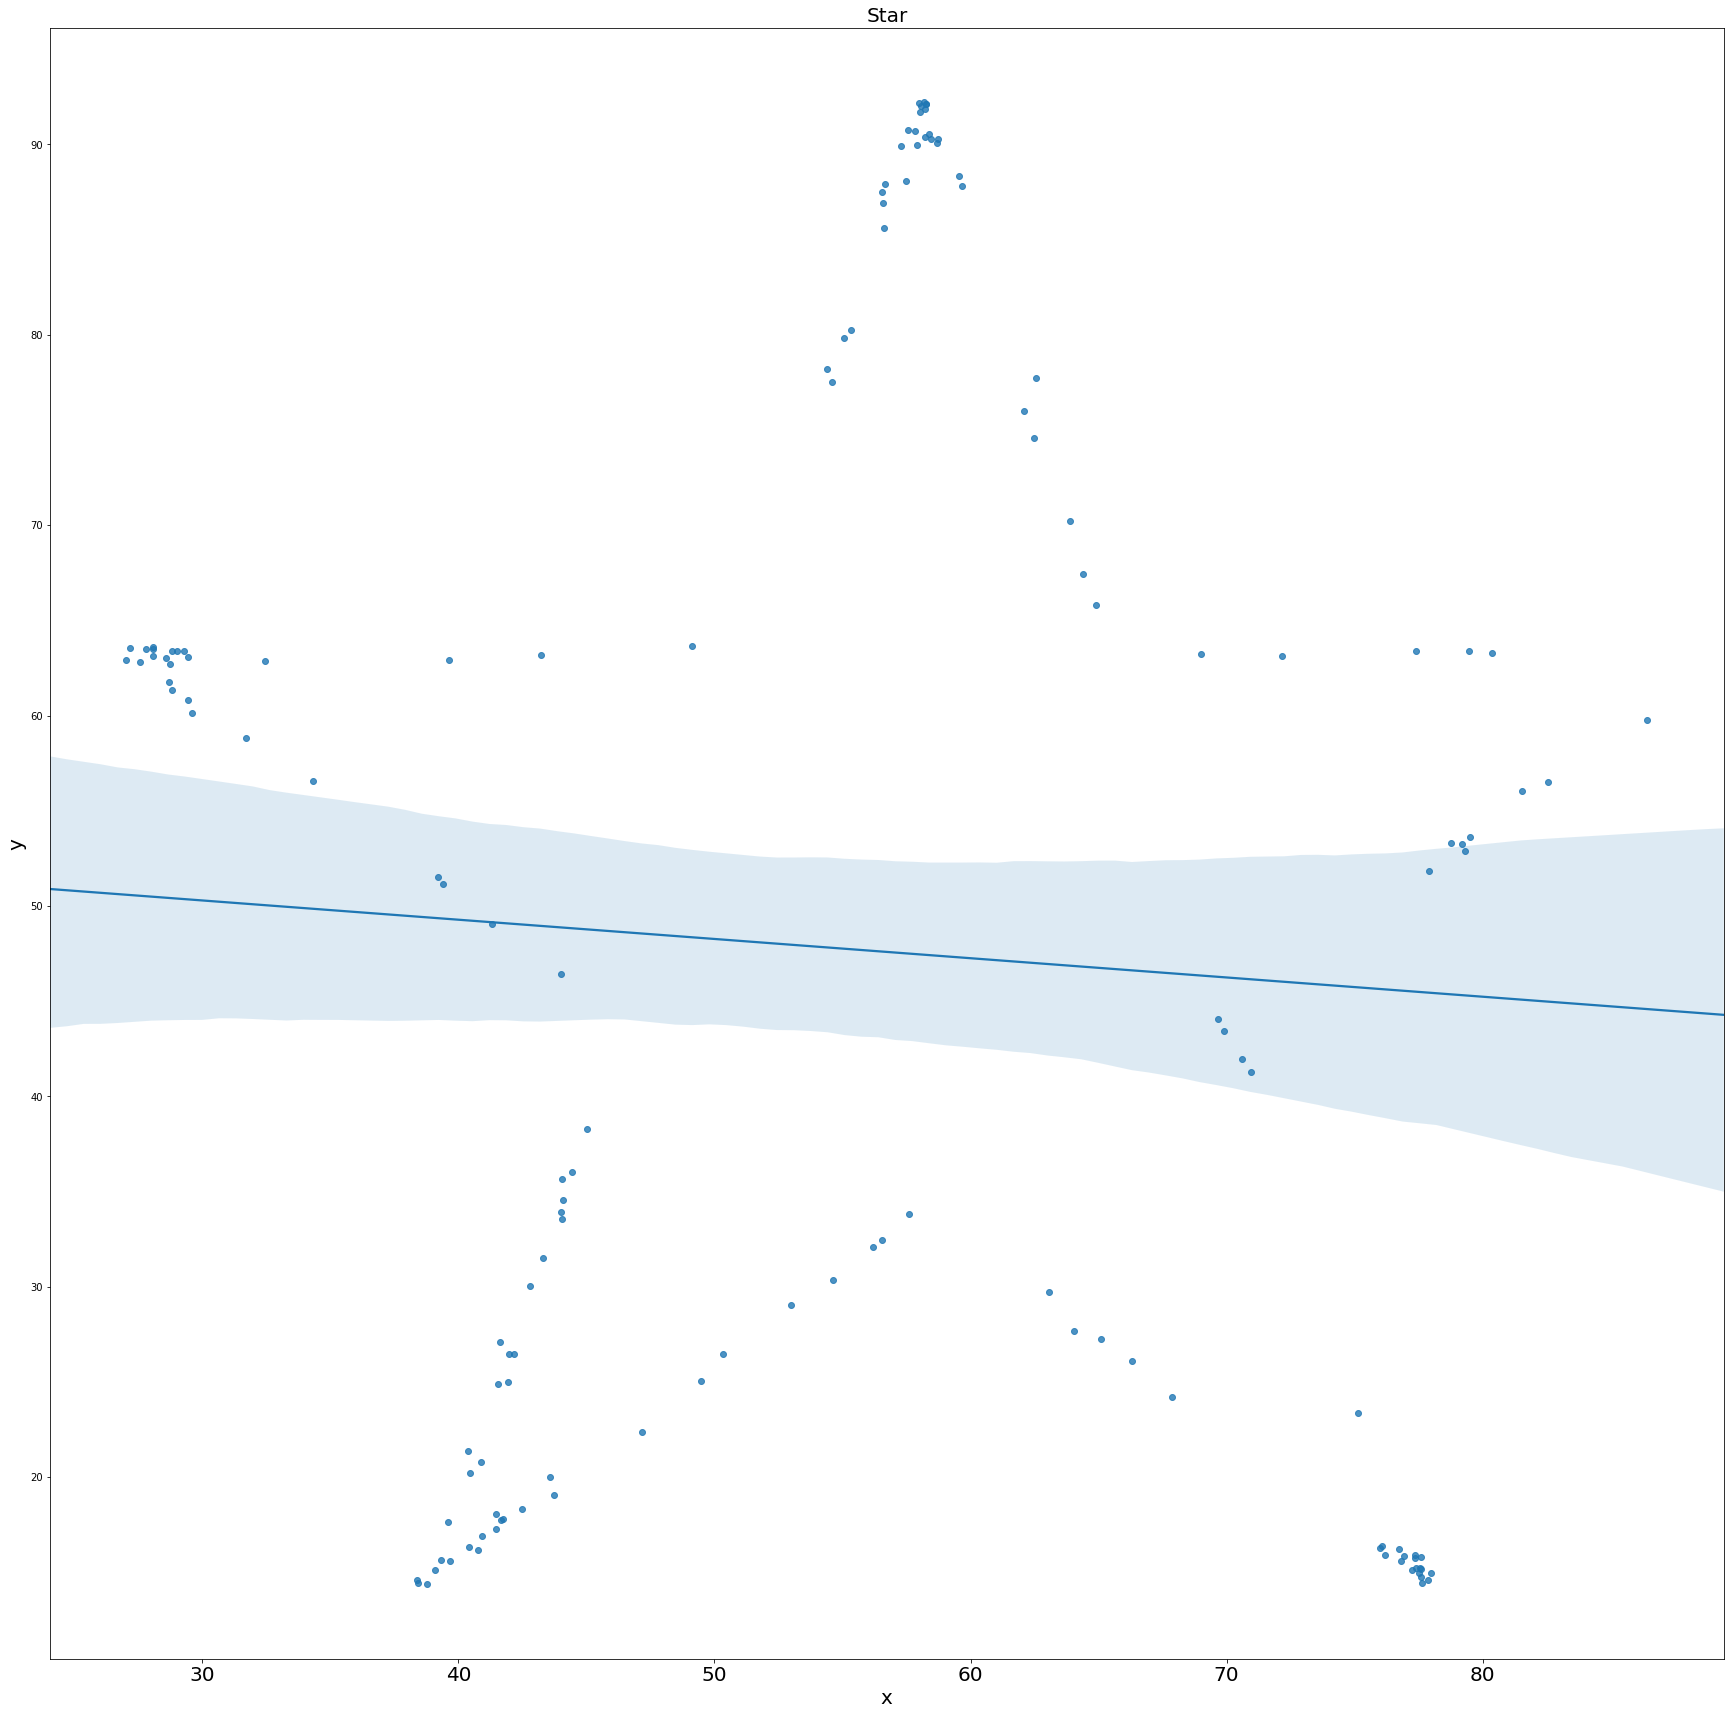

In [37]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = startable)
plt.title("Star")

In [38]:
f1 = "y~x"
model = ols(formula = f1, data = startable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5572
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.457
Time:                        15:25:00   Log-Likelihood:                -668.35
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.3267      7.692      6.933      0.000      38.120      68.533
x             -0.1011      0.135     -0.746      0.457      -0.369       0.167
==============================================================================
Omnibus:                      103.478   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.794
Skew:                           0.269   Prob(JB):                      0.00275
Kurtosis:                       1.695   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## X subset

In [39]:
x_shapetable = tablesaur.loc[tablesaur["dataset"] == "x_shape"]
x_shapetable.drop('dataset', axis = 1).head()

,x,y
568,38.337757,92.472719
569,35.751871,94.116768
570,32.767218,88.518295
571,33.729607,88.622266
572,37.238249,83.724928


Text(0.5, 1.0, 'X shape')

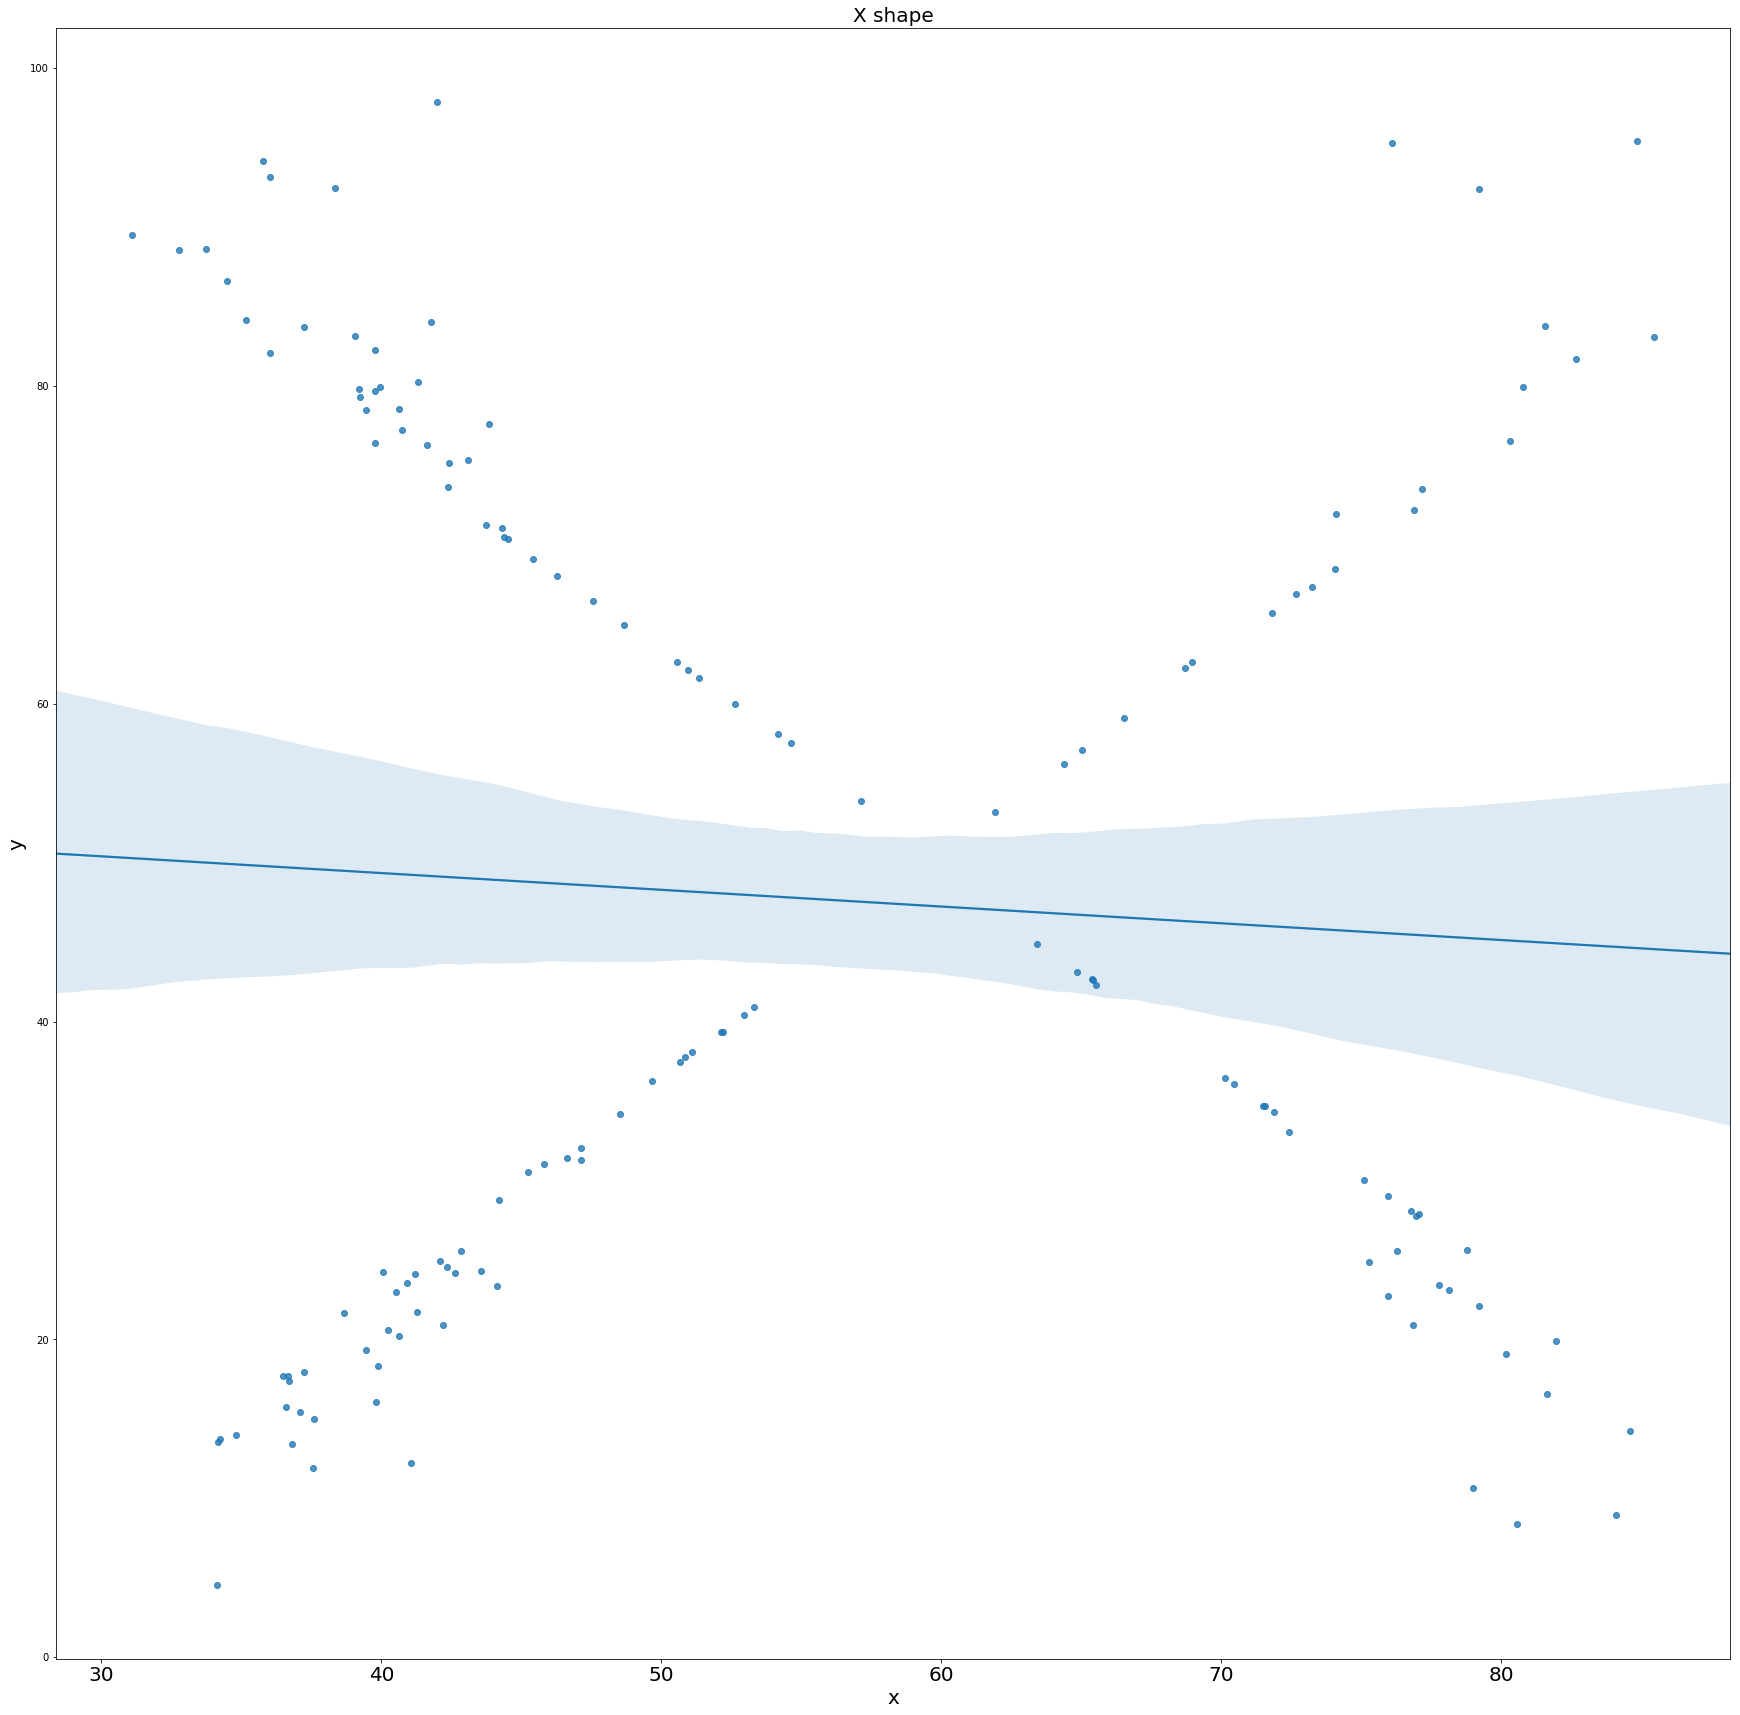

In [40]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = x_shapetable)
plt.title("X shape")

In [41]:
f1 = "y~x"
model = ols(formula = f1, data = x_shapetable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6048
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.438
Time:                        15:25:01   Log-Likelihood:                -668.32
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.5542      7.689      6.965      0.000      38.353      68.756
x             -0.1053      0.135     -0.778      0.438      -0.373       0.162
==============================================================================
Omnibus:                      208.882   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.593
Skew:                           0.201   Prob(JB):                      0.00184
Kurtosis:                       1.597   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dino subset

In [42]:
dinotable = tablesaur.loc[tablesaur["dataset"] == "dino"]
dinotable.drop('dataset', axis = 1).head()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


Text(0.5, 1.0, 'Original Datasaur')

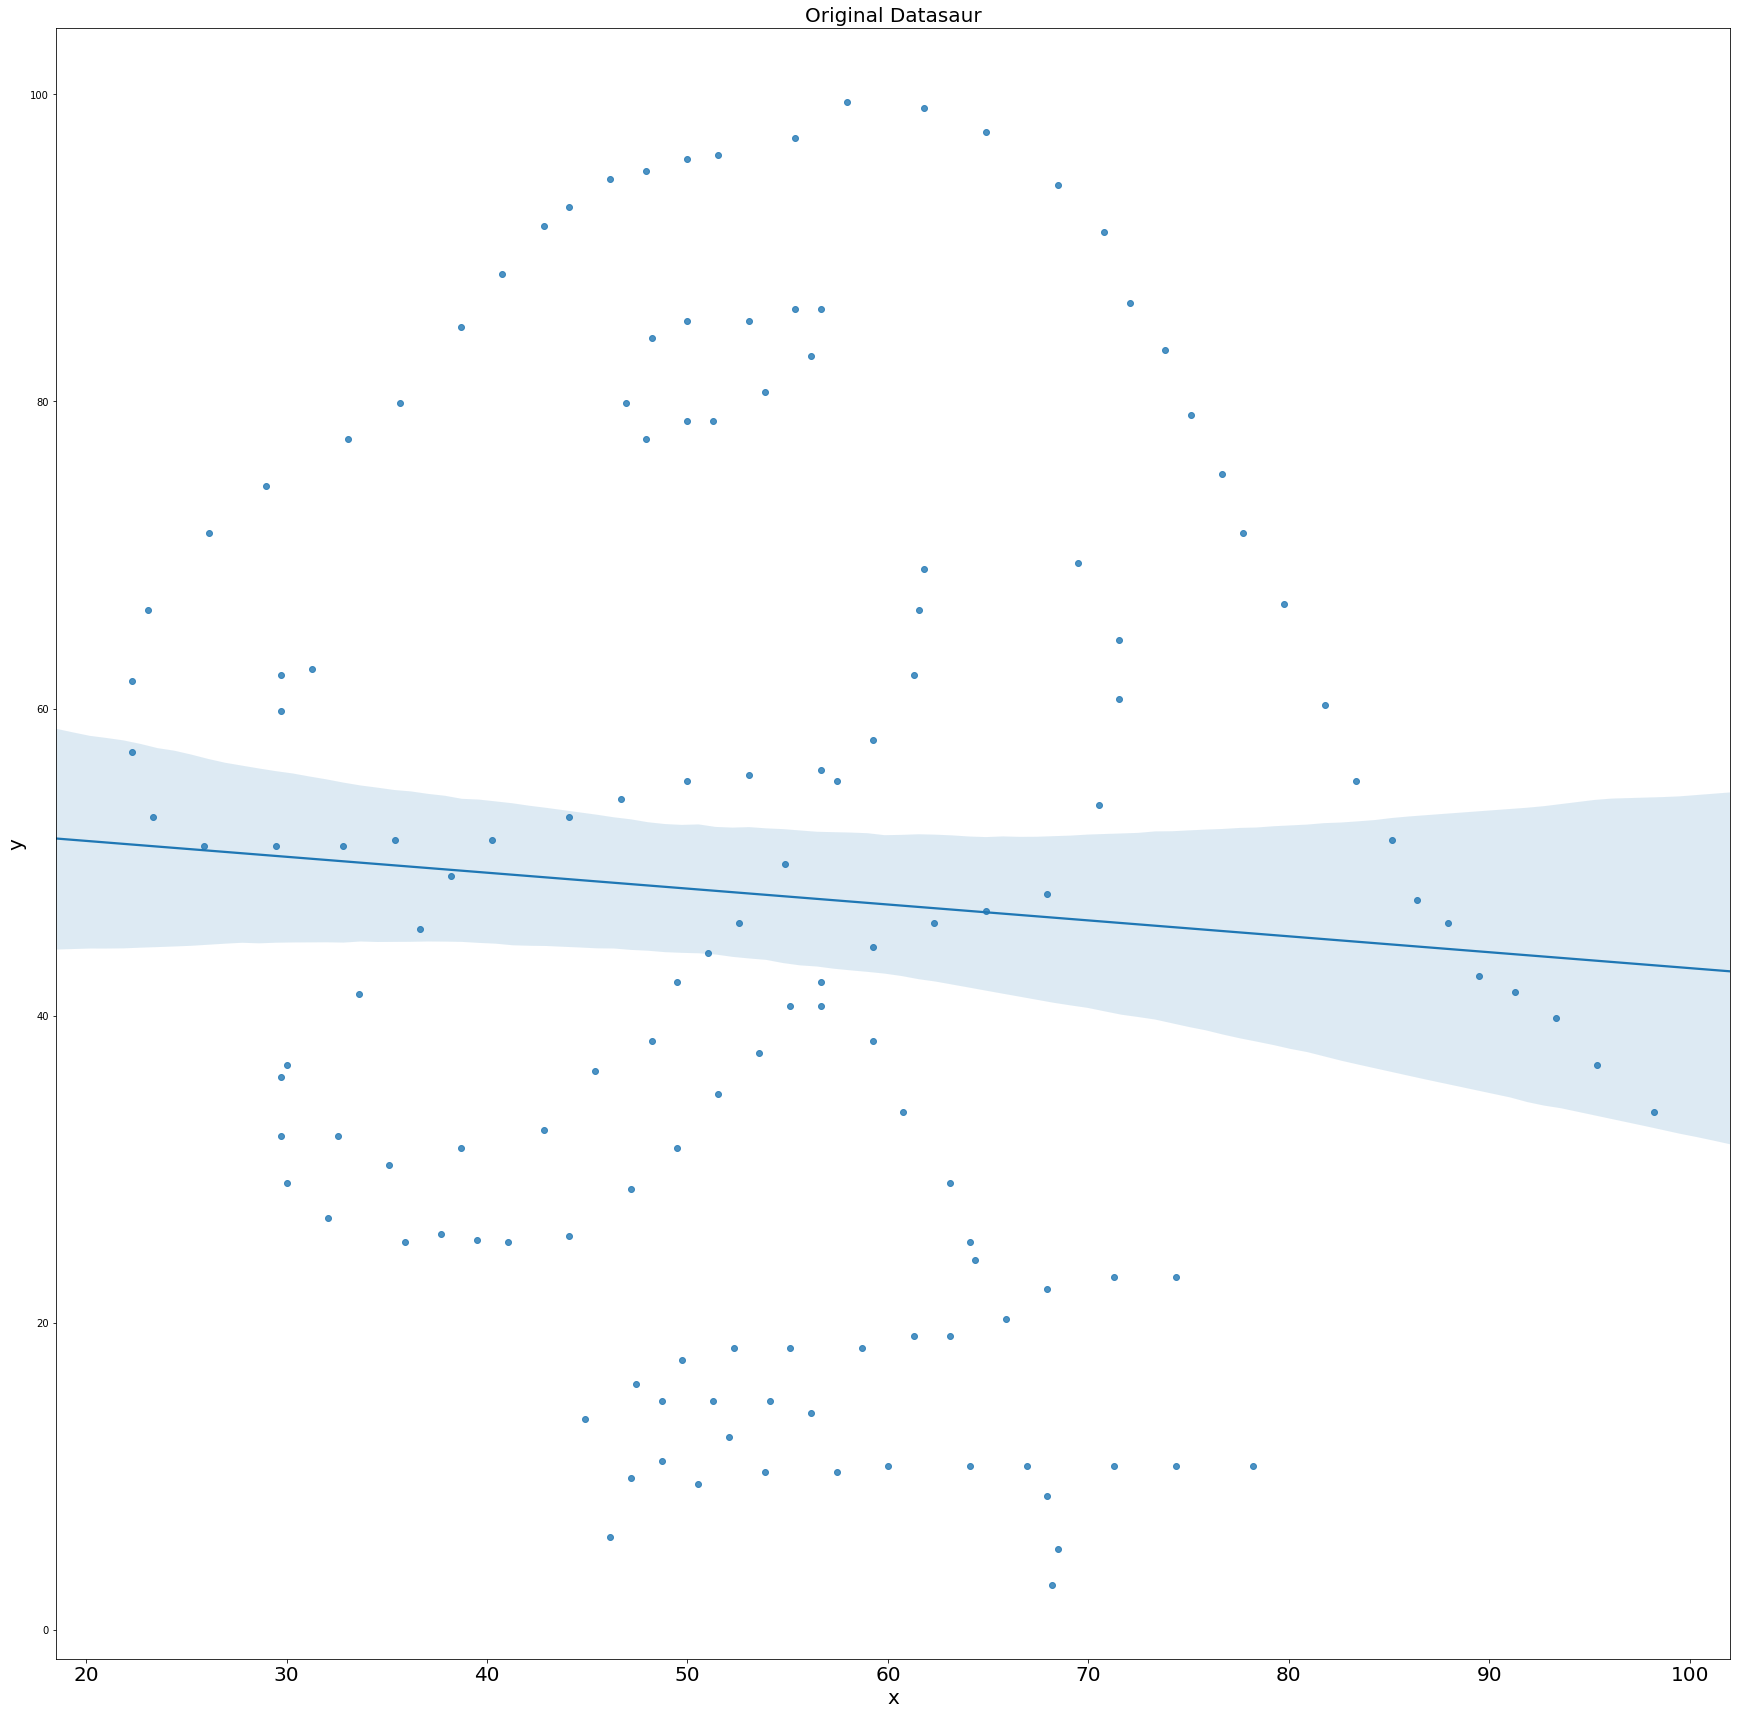

In [43]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = dinotable)
plt.title("Original Datasaur")

In [44]:
f1 = "y~x"
model = ols(formula = f1, data = dinotable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5844
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.446
Time:                        15:25:02   Log-Likelihood:                -668.36
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4530      7.693      6.948      0.000      38.243      68.663
x             -0.1036      0.136     -0.764      0.446      -0.371       0.164
==============================================================================
Omnibus:                       27.737   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.023
Skew:                           0.266   Prob(JB):                       0.0181
Kurtosis:                       1.964   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Away subset

In [45]:
awaytable = tablesaur.loc[tablesaur['dataset'] == 'away']
awaytable.drop('dataset', axis = 1).head()

,x,y
142,32.331110,61.411101
143,53.421463,26.186880
144,63.920202,30.832194
145,70.289506,82.533649
146,34.118830,45.734551


Text(0.5, 1.0, 'Slant Up')

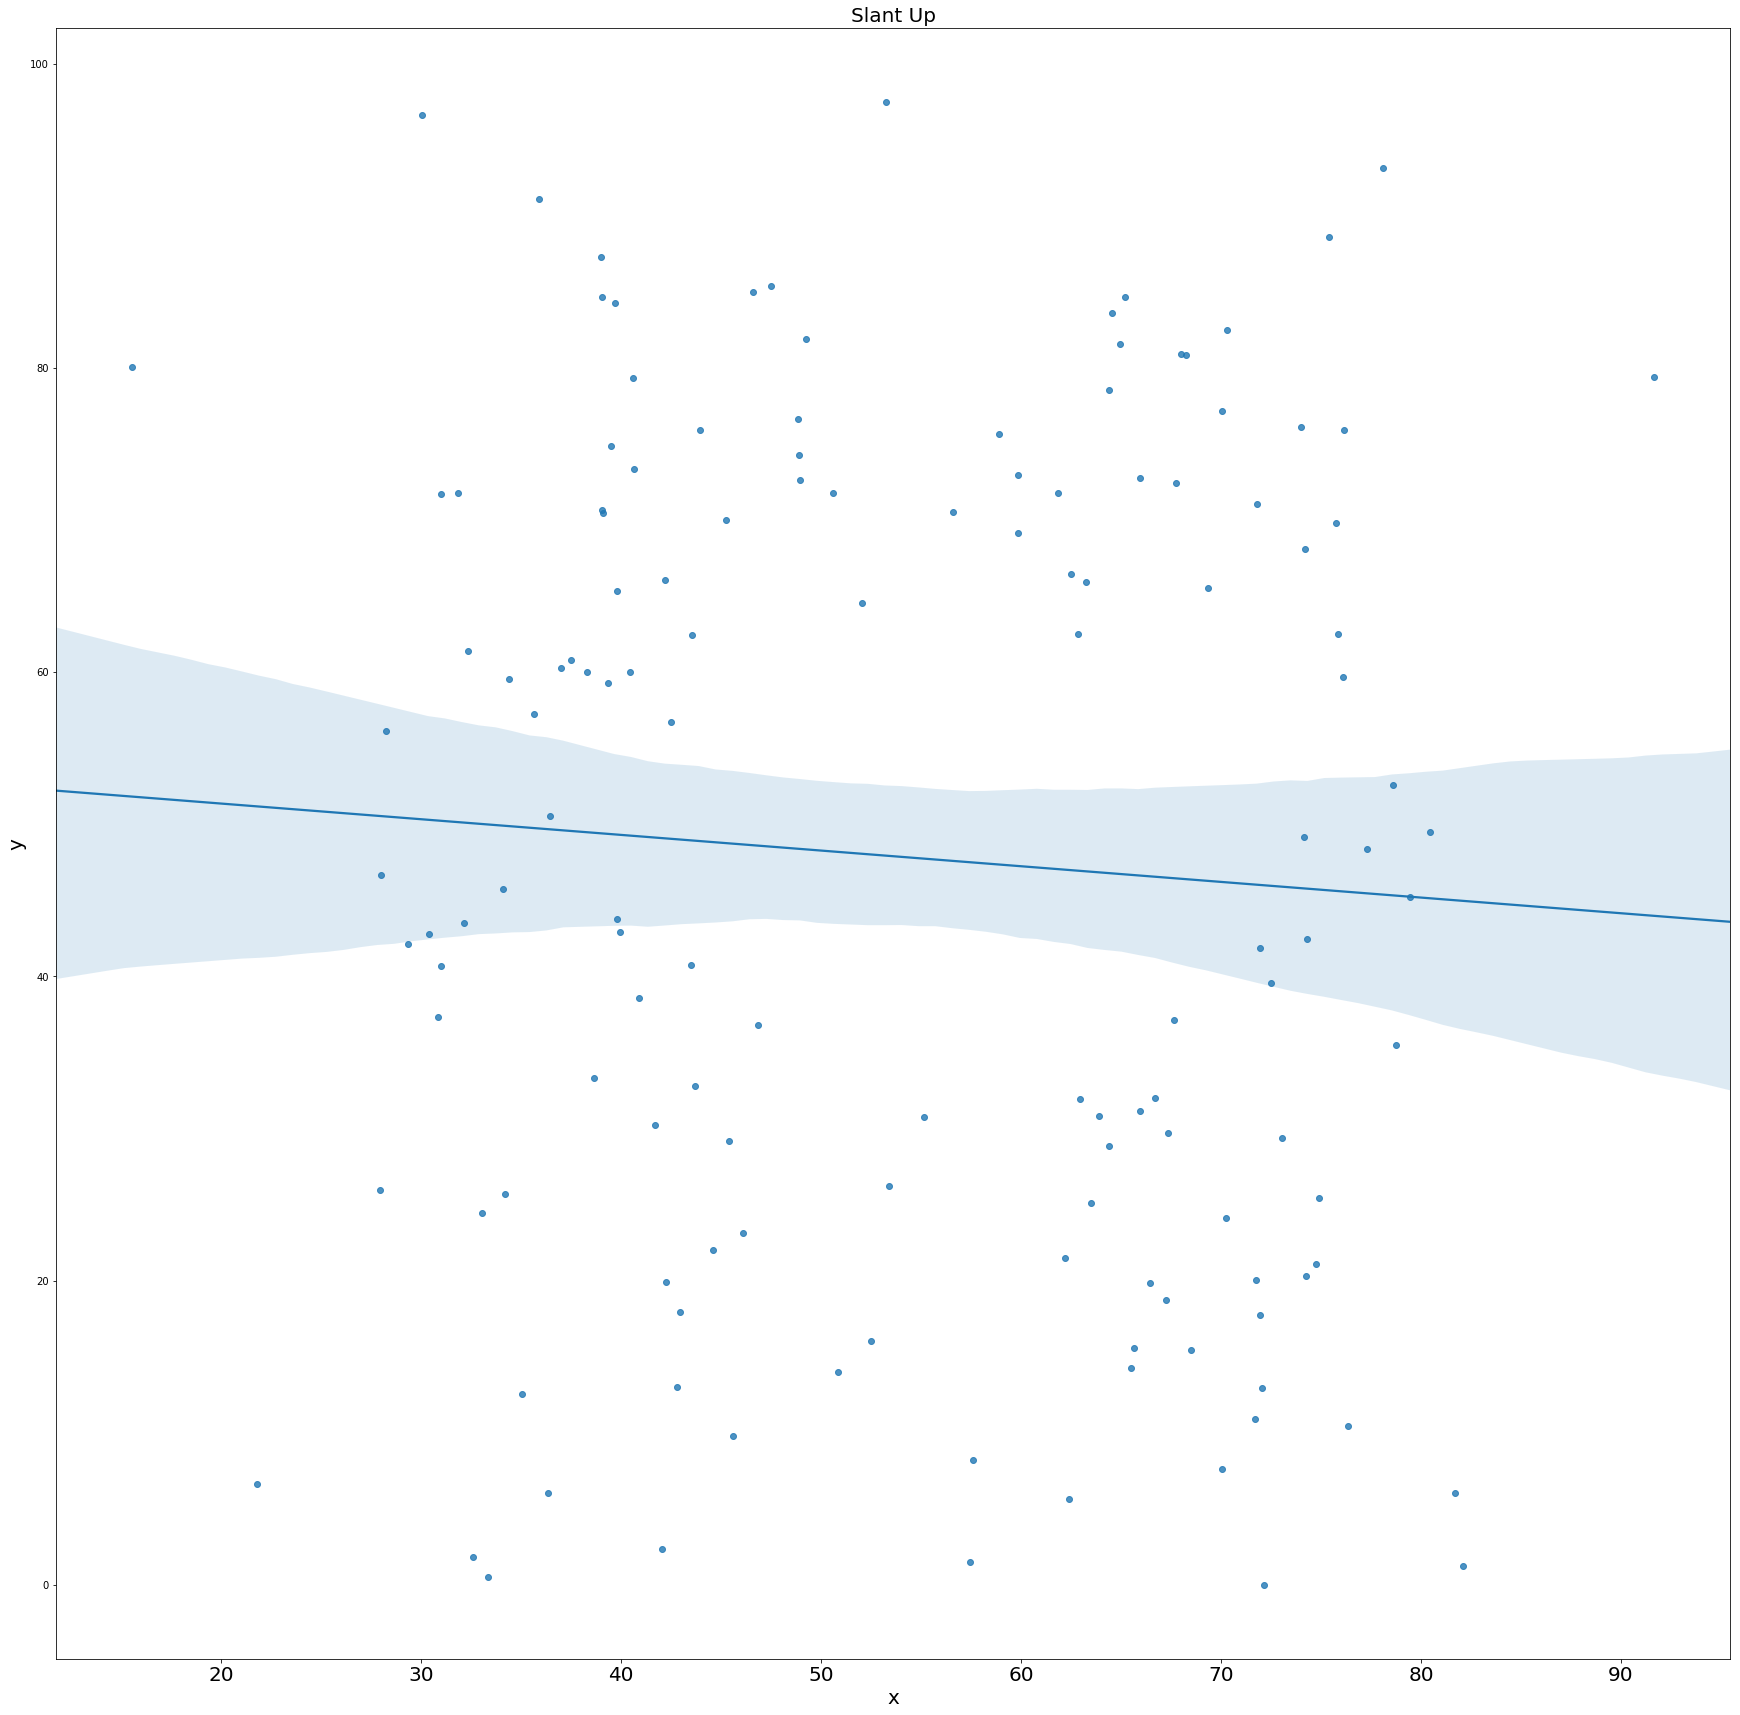

In [46]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = awaytable)
plt.title("Slant Up")

In [47]:
f1 = "y~x"
model = ols(formula = f1, data = awaytable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5781
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.448
Time:                        15:25:02   Log-Likelihood:                -668.39
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4251      7.693      6.944      0.000      38.215      68.635
x             -0.1030      0.135     -0.760      0.448      -0.371       0.165
==============================================================================
Omnibus:                       70.964   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.307
Skew:                          -0.084   Prob(JB):                      0.00953
Kurtosis:                       1.757   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Horizontal lines subset

In [48]:
h_linestable = tablesaur.loc[tablesaur["dataset"] == "h_lines"]
h_linestable.drop('dataset', axis = 1).head()

,x,y
284,53.366567,90.208030
285,52.801979,90.088065
286,47.054130,90.458936
287,42.448434,89.507700
288,42.704036,90.442629


Text(0.5, 1.0, 'Horizontal Lines')

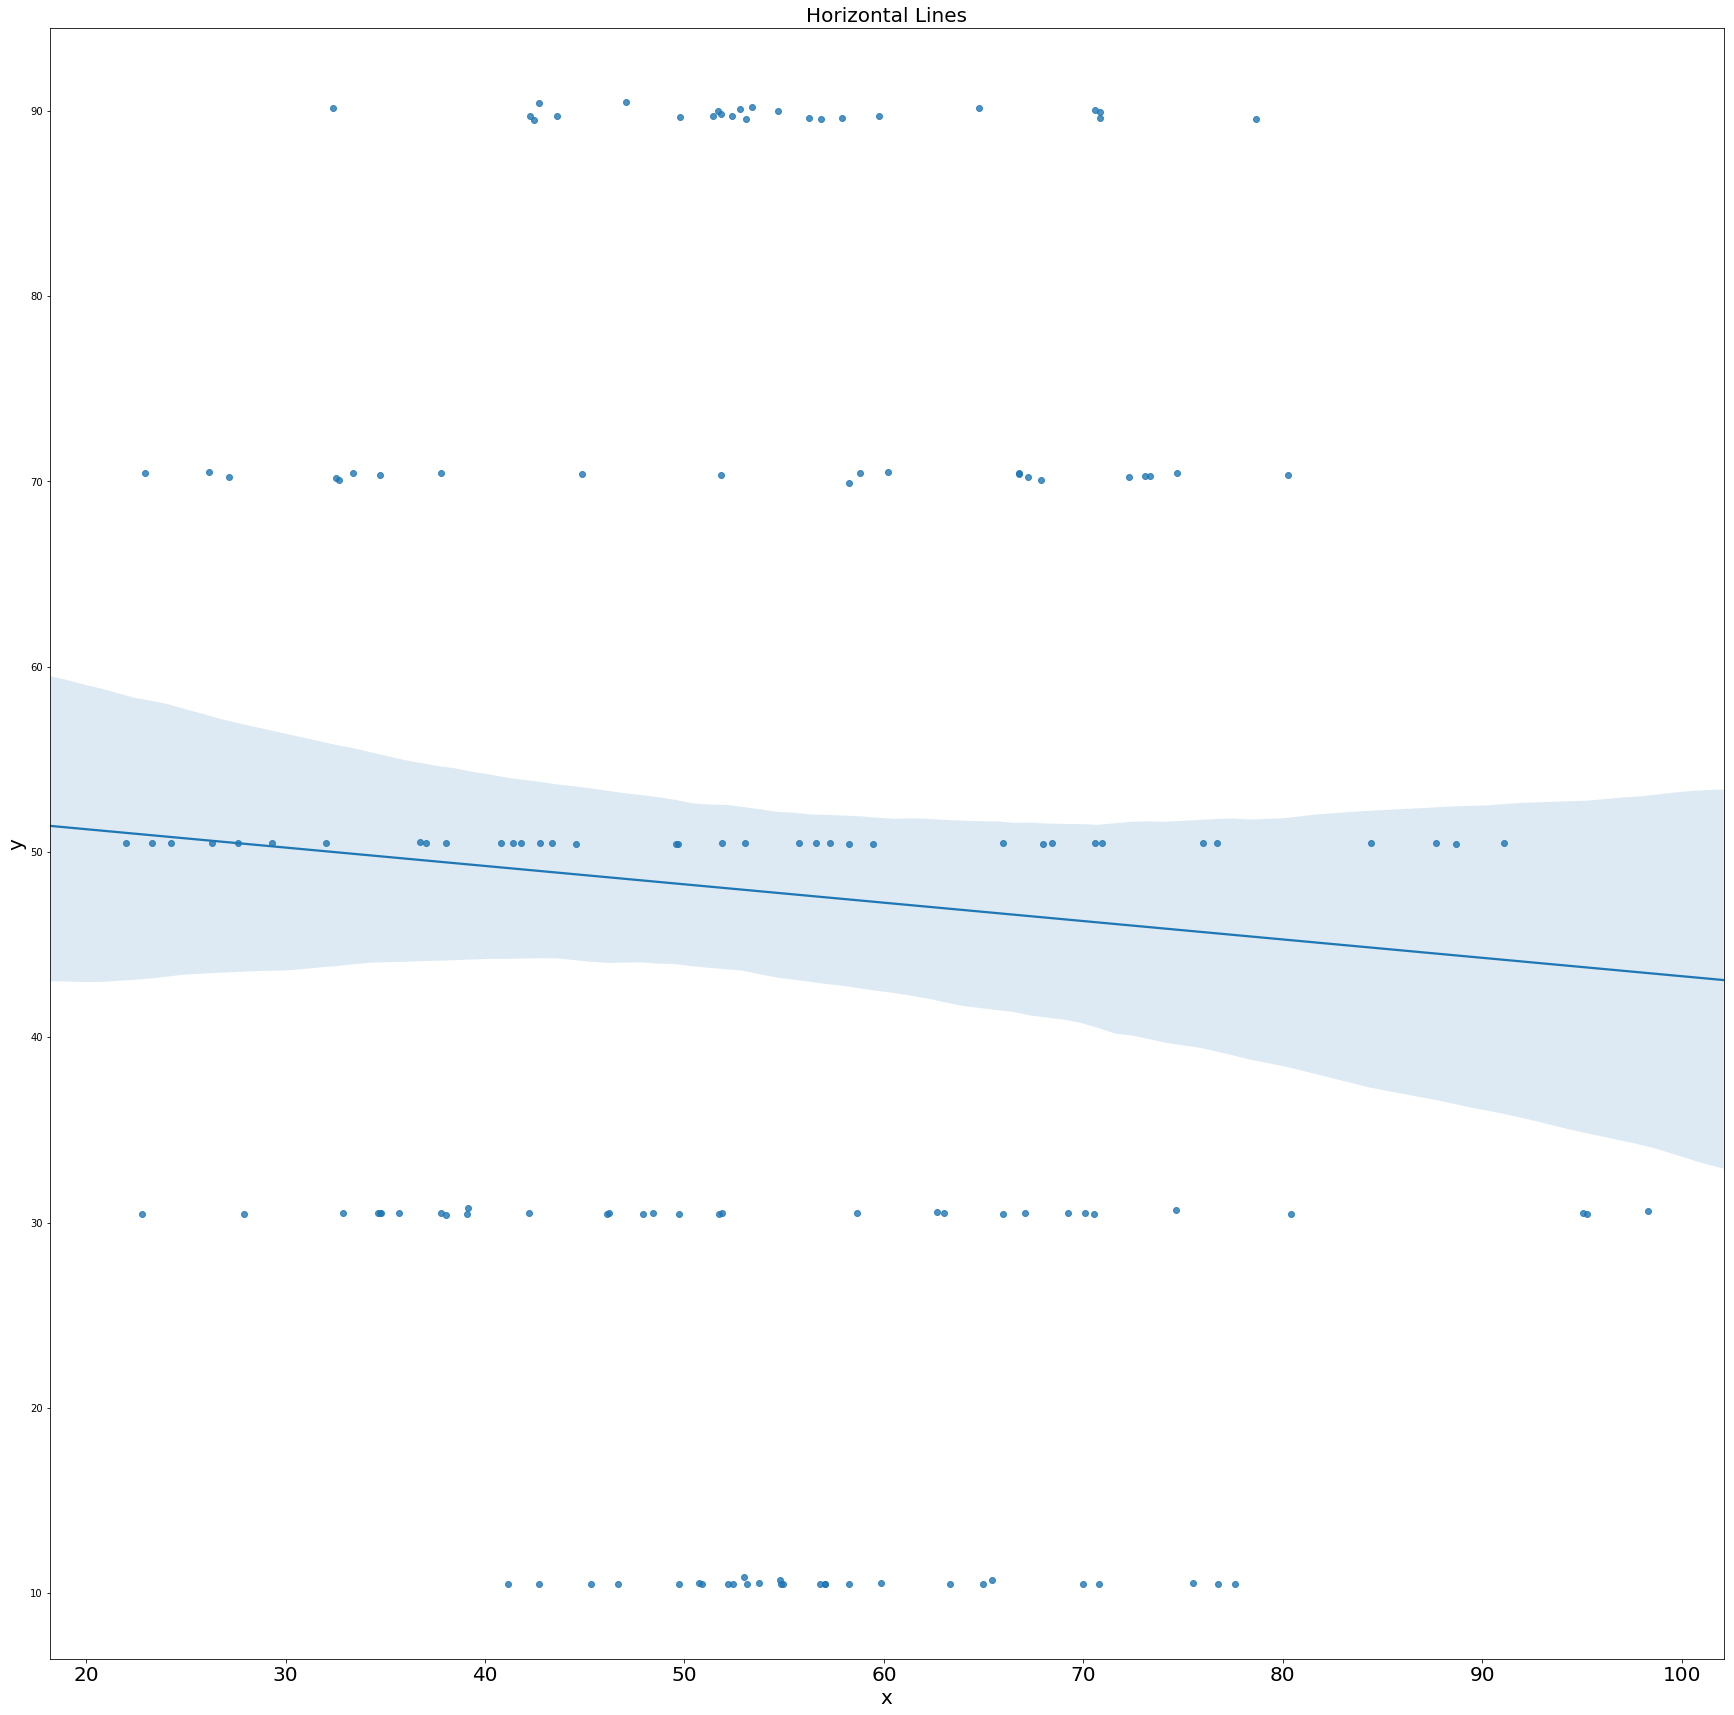

In [49]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = h_linestable)
plt.title("Horizontal Lines")

In [50]:
f1 = "y~x"
model = ols(formula = f1, data = h_linestable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5353
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.466
Time:                        15:25:03   Log-Likelihood:                -668.41
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.2111      7.695      6.915      0.000      37.997      68.425
x             -0.0992      0.136     -0.732      0.466      -0.367       0.169
==============================================================================
Omnibus:                       41.063   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.220
Skew:                           0.164   Prob(JB):                       0.0164
Kurtosis:                       1.868   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Vertical lines subset

In [51]:
v_linestable = tablesaur.loc[tablesaur["dataset"] == "v_lines"]
v_linestable.drop('dataset', axis = 1).head()

,x,y
426,50.481508,93.222701
427,50.282406,97.609984
428,50.186703,99.694680
429,50.326911,90.022053
430,50.456207,89.987410


Text(0.5, 1.0, 'Vertical Lines')

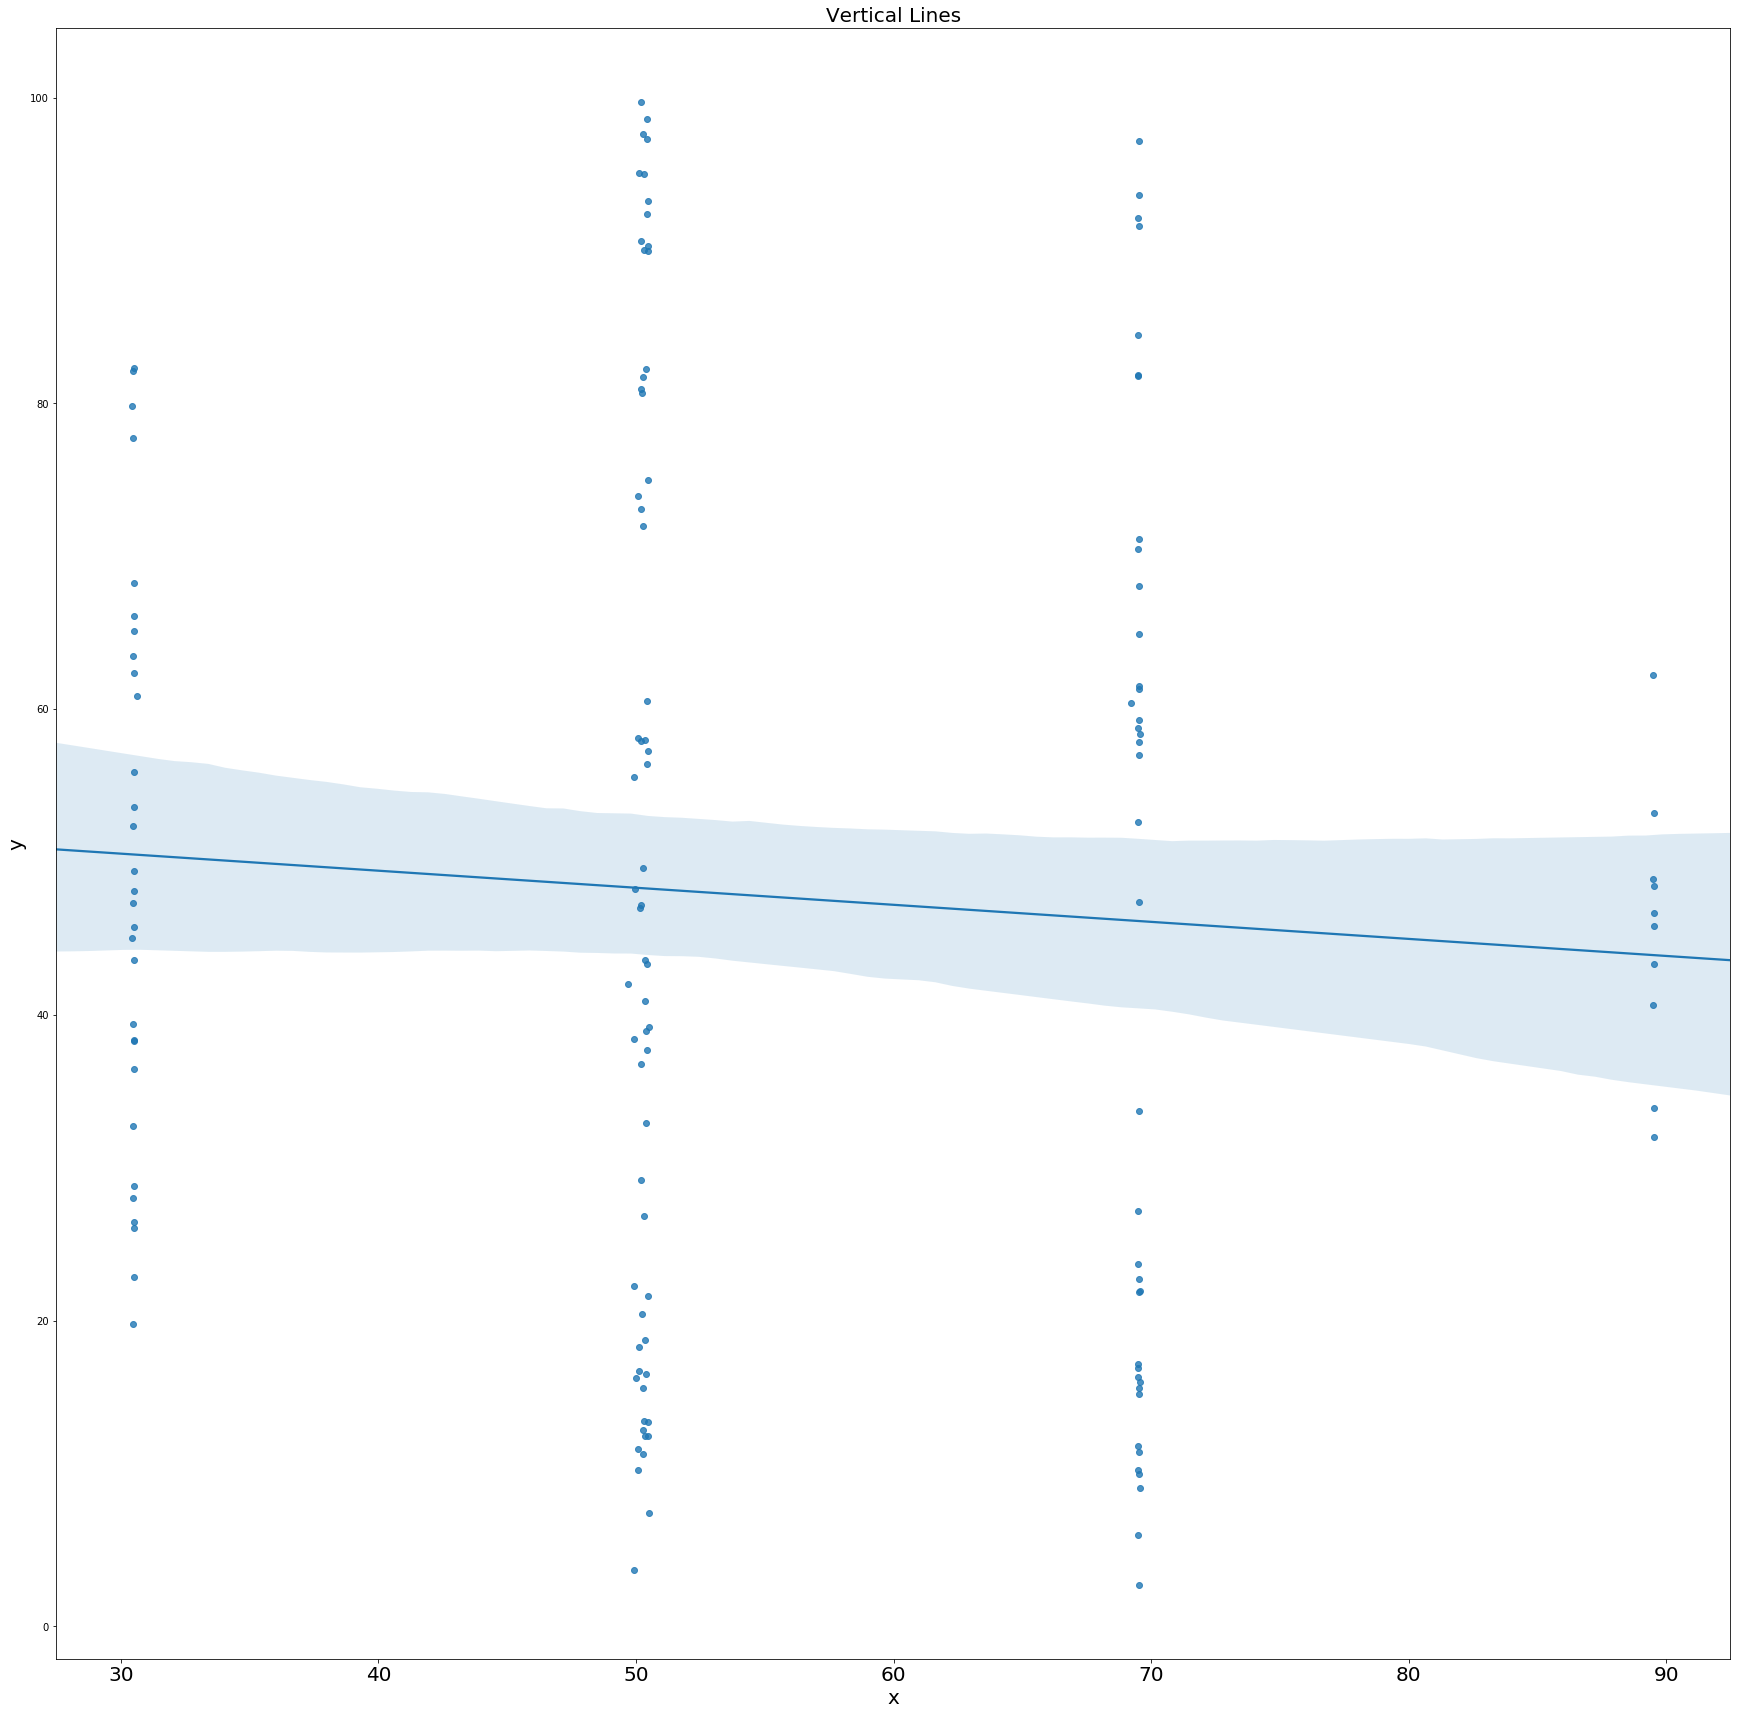

In [52]:
f, ax = plt.subplots(figsize = (30,30))

sns.regplot(x = "x", y = "y", data = v_linestable)
plt.title("Vertical Lines")

In [53]:
f1 = "y~x"
model = ols(formula = f1, data = v_linestable).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6784
Date:                Mon, 20 May 2019   Prob (F-statistic):              0.412
Time:                        15:25:03   Log-Likelihood:                -668.32
No. Observations:                 142   AIC:                             1341.
Df Residuals:                     140   BIC:                             1347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8908      7.690      7.008      0.000      38.687      69.095
x             -0.1116      0.135     -0.824      0.412      -0.379       0.156
==============================================================================
Omnibus:                       26.368   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.616
Skew:                           0.241   Prob(JB):                       0.0222
Kurtosis:                       1.973   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bootstrap each dataset

In [74]:
def bootstrapper(data, n):
    '''Return array from bootstrapping n times'''
    if isinstance(data, pd.Series):
            data = data.copy()
            data.index = range(len(data.index))
    if n == None:
        n = len(data)
    resample = np.random.choice(data, size = n)
    return resample

In [75]:
bootstrapper(wide_linestable['x'], n = 2000)

array([36.94633144, 34.23335543, 38.40283688, ..., 33.87350952,
       31.31954867, 70.96261031])

In [105]:
def bootstrap_df(name, x, y, n):
    '''Return dataframe with name and bootstrapped values'''
    if n == None:
        n = len(x)
    
    if isinstance(x, pd.Series):
        x = x.copy()
        x.index = range(len(x.index))
    resample_x = pd.Series(np.random.choice(x, size = n))
    
    if isinstance(y, pd.Series):
        y = y.copy()
        y.index = range(len(y.index))
    resample_y = pd.Series(np.random.choice(y, size = n))
    
    name_col = pd.Series([name] * n)
    dict_over = {'dataset': name_col, 'x': resample_x, 'y': resample_y}
    
    bs = pd.concat(dict_over, axis = 1)

    return bs

In [108]:
bs_wl = bootstrap_df(name ='bootstrapped_wide_lines', x = wide_linestable['x'],y = wide_linestable['y'], n = 10000)

                   dataset          x          y
0  bootstrapped_wide_lines  66.699265  38.502484
1  bootstrapped_wide_lines  34.863444  46.284474
2  bootstrapped_wide_lines  65.815540  50.465235
3  bootstrapped_wide_lines  32.438650  10.463512
4  bootstrapped_wide_lines  65.714076  89.281230


Now we construct a massive dataframe of all the bootstrapped datasets so we can perform ANOVA again.

'dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'

In [117]:
bs_di =  bootstrap_df(name = 'bootstrapped_dino', x = dinotable['x'], y = dinotable['y'], n = 10000)
bs_sd =  bootstrap_df(name = 'bootstrapped_slant_down', x = slant_downtable['x'], y = slant_downtable['y'], n = 10000)
bs_su = bootstrap_df(name = 'bootstrapped_slant_up', x = slant_uptable['x'], y = slant_uptable['y'], n = 10000)
bs_be = bootstrap_df(name = 'bootstrapped_bullseye', x = bullseyetable['x'], y = bullseyetable['y'], n = 10000)
bs_ci = bootstrap_df(name = 'bootstrapped_circle', x = circletable['x'], y = circletable['y'], n = 10000)
bs_wl = bootstrap_df(name = 'bootstrapped_wide_line', x = wide_linestable['x'], y = wide_linestable['y'], n = 10000)
bs_hl = bootstrap_df(name = 'bootstrapped_high_lines', x = high_linestable['x'], y = high_linestable['y'], n = 10000)
bs_st = bootstrap_df(name = 'bootstrapped_star', x = startable['x'], y = startable['y'], n = 10000)
bs_xs = bootstrap_df(name = 'bootstrapped_x_shape', x = x_shapetable['x'], y = x_shapetable['y'], n = 10000)
bs_do = bootstrap_df(name = 'bootstrapped_dots', x = dotstable['x'], y = dotstable['y'], n = 10000)
bs_aw = bootstrap_df(name = 'bootstrapped_away', x = awaytable['x'], y = awaytable['y'], n = 10000)
bs_hz = bootstrap_df(name = 'bootstrapped_hor_lines', x = h_linestable['x'], y = h_linestable['y'], n = 10000)
bs_vl = bootstrap_df(name = 'bootstrapped_ver_lines', x = v_linestable['x'], y = v_linestable['y'], n = 10000)


             dataset        x        y
0  bootstrapped_dino  22.3077  46.0256
1  bootstrapped_dino  51.5385  40.6410
2  bootstrapped_dino  44.8718  10.6410
3  bootstrapped_dino  46.6667  41.4103
4  bootstrapped_dino  32.5641  20.2564
                   dataset          x          y
0  bootstrapped_slant_down  60.375745  64.413463
1  bootstrapped_slant_down  79.479358  27.624264
2  bootstrapped_slant_down  47.446467  35.414999
3  bootstrapped_slant_down  54.802683  47.867005
4  bootstrapped_slant_down  37.627053  15.018370
                 dataset          x          y
0  bootstrapped_slant_up  27.887719  42.311552
1  bootstrapped_slant_up  33.980634  40.133113
2  bootstrapped_slant_up  75.168668  32.538569
3  bootstrapped_slant_up  33.167757  47.800299
4  bootstrapped_slant_up  61.618568  35.016801
                 dataset          x          y
0  bootstrapped_bullseye  63.497323  84.819821
1  bootstrapped_bullseye  24.635540  84.332177
2  bootstrapped_bullseye  53.101382  34.527636
3 

In [118]:
l = [bs_di, bs_sd, bs_su, bs_be, bs_ci, bs_do, bs_hl, bs_st, bs_xs, bs_wl, bs_aw, bs_hz, bs_vl]

In [120]:
massive_df = pd.concat(l)
massive_df.head()

,dataset,x,y
0,bootstrapped_dino,22.3077,46.0256
1,bootstrapped_dino,51.5385,40.6410
2,bootstrapped_dino,44.8718,10.6410
3,bootstrapped_dino,46.6667,41.4103
4,bootstrapped_dino,32.5641,20.2564


In [121]:
massive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130000 entries, 0 to 9999
Data columns (total 3 columns):
dataset    130000 non-null object
x          130000 non-null float64
y          130000 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.0+ MB


## ANOVA on bootstrapped data

Null hypothesis: There is no difference (alpha = 0.05) between the distribution of a bootstrapped dataset and the distribution of another. 
Alternative hypothesis: there is a difference (alpha = 0.05) between the distribution of a bootstrapped dataset and that of another.

In [122]:
formula = 'y ~ C(dataset) + x'
lm = ols(formula, massive_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                  sum_sq        df         F    PR(>F)
C(dataset)  4.242765e+03      12.0  0.491035  0.921403
x           4.765256e+02       1.0  0.661807  0.415924
Residual    9.359478e+07  129986.0       NaN       NaN


Based on the f-statistic, we reject the null hypothesis. There is a difference (alpha = 0.05) between the distribution of a given bootstrapped dataset and the distribution of another.